# order
* load data
* data browse 
* data cleaning
* feature engineering
* eda
* model 
* predict

# load data

In [41]:
import numpy as np # np.random.seed(2020)
import pandas as pd; pd.options.display.float_format='{:.1f}'.format
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white',context='talk')
import sklearn
import lightgbm as lgb
import bayes_opt

In [42]:
train=pd.read_csv('../input/ai-dacon/train.csv')
test=pd.read_csv('../input/ai-dacon/test.csv')
submission=pd.read_csv('../input/ai-dacon/sample_submission.csv')

In [43]:
def datainfo(df):
    return pd.DataFrame([(col,df[col].nunique(),df[col].isna().sum(),df[col].dtype,
                         df[col].unique()[:5]) for col in df.columns],
                       columns=['name','nunique','missing','dtype','value :5'])

datainfo(train)

,name,nunique,missing,dtype,value :5
0,id,4752,0,int64,"[0, 1, 2, 3, 4]"
1,X00,226,0,float64,"[9.7, 9.3, 9.4, 9.2, 9.1]"
2,X01,196,0,float64,"[988.8, 988.9, 989.0, 988.7, 988.6]"
3,X02,64,0,float64,"[1.2, 1.7, 1.1, 1.5, 0.8]"
4,X03,55,0,float64,"[0.6, 1.9, 2.3, 0.7, 1.7]"
5,X04,134,0,float64,"[0.0, 0.1, 0.2, 0.5, 0.6]"
6,X05,195,0,float64,"[1009.3, 1009.2, 1009.1, 1009.4, 1009.0]"
7,X06,193,0,float64,"[989.6, 989.7, 989.5, 989.4, 989.3]"
8,X07,210,0,float64,"[12.2, 12.1, 12.0, 11.9, 11.8]"
9,X08,202,0,float64,"[1009.9, 1010.0, 1010.1, 1010.2, 1009.8]"


# data browse

'temperature'   : ["X00","X07","X28","X31","X32"], #기온  
'localpressure' : ["X01","X06","X22","X27","X29"], #현지기압  
'windspeed'     : ["X02","X03","X18","X24","X26"], #풍속  
'precipitation' : ["X04","X10","X21","X36","X39"], #일일 누적강수량  
'atmpressure'   : ["X05","X08","X09","X23","X33"], #해면기압  
'insolation'    : ["X11","X34","X14","X16","X19"], #일일 누적일사량  
'humidity'      : ["X12","X20","X30","X37","X38"], #습도  
'winddirection' : ["X13","X15","X17","X25","X35"], #풍향  

In [44]:
train_1=train.loc[:4319,'id':'Y17']
train_2=pd.concat([train.loc[4320:,'id':'X39'],train.loc[4320:,'Y18']],axis=1)
train_3=pd.concat([train.loc[3888:4319,'Y00':'Y17'].reset_index(drop=True),
                   train.loc[4320:,'Y18'].reset_index(drop=True)],axis=1)

* higher relation with humidity,temperature,windspeed 
* middle relation with atmpressure,localpressure
* lower relation with etc.

In [45]:
def corr(df,col):
    corr=df.corr().abs().unstack().reset_index()
    return corr[corr['level_0']==col].sort_values(by=0,ascending=False)

corr(train_2,'Y18')

,level_0,level_1,0
1763,Y18,Y18,1.0
1735,Y18,X12,0.9
1753,Y18,X30,0.9
1754,Y18,X31,0.9
1755,Y18,X32,0.9
1760,Y18,X37,0.9
1723,Y18,X00,0.8
1743,Y18,X20,0.8
1730,Y18,X07,0.8
1761,Y18,X38,0.8


* close to periods Y18
* higher relation with 16 9 15 10 13 11 12 5 
* not find meaning of 3 4

In [46]:
corr(train_3,'Y18')

,level_0,level_1,0
360,Y18,Y18,1.0
358,Y18,Y16,0.9
351,Y18,Y09,0.9
357,Y18,Y15,0.9
352,Y18,Y10,0.9
355,Y18,Y13,0.9
353,Y18,Y11,0.9
354,Y18,Y12,0.9
347,Y18,Y05,0.9
359,Y18,Y17,0.8


* higher relation with temperature,humidity,windspeed ... 

In [47]:
corr(train_1,'Y16')

,level_0,level_1,0
3420,Y16,Y16,1.0
3413,Y16,Y09,1.0
3419,Y16,Y15,1.0
3415,Y16,Y11,1.0
3421,Y16,Y17,1.0
3414,Y16,Y10,1.0
3409,Y16,Y05,0.9
3416,Y16,Y12,0.9
3410,Y16,Y06,0.9
3417,Y16,Y13,0.9


# data cleaning

'temperature'   : ["X00","X07","X28","X31","X32"], #기온  
'localpressure' : ["X01","X06","X22","X27","X29"], #현지기압  
'windspeed'     : ["X02","X03","X18","X24","X26"], #풍속  
'precipitation' : ["X04","X10","X21","X36","X39"], #일일 누적강수량  
'atmpressure'   : ["X05","X08","X09","X23","X33"], #해면기압  
'insolation'    : ["X11","X34","X14","X16","X19"], #일일 누적일사량  
'humidity'      : ["X12","X20","X30","X37","X38"], #습도  
'winddirection' : ["X13","X15","X17","X25","X35"], #풍향  

In [48]:
train_1.drop(['X14','X16','X19'],axis=1,inplace=True)
train_2.drop(['X14','X16','X19'],axis=1,inplace=True)
test.drop(['X14','X16','X19'],axis=1,inplace=True)

* create time feature

In [49]:
train_1['min']=train_1.index%6
train_1['hour']=train_1.index%144/6
train_1['abs_hour']=(train_1.index%144//6)
train_2['min']=train_2.index%6
train_2['hour']=train_2.index%144/6
train_2['abs_hour']=(train_2.index%144//6)
test['min']=test.index%6
test['hour']=test.index%144/6
test['abs_hour']=(test.index%144//6)

* group time & feature

In [50]:
features=['X00','X07','X28','X31','X32']

for f in features:
    min_f=train_1.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    train_1=pd.merge(train_1,min_f,on=['min'])
    hour_f=train_1.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    train_1=pd.merge(train_1,hour_f,on=['hour'])
    abs_hour_f=train_1.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    train_1=pd.merge(train_1,abs_hour_f,on=['abs_hour'])
    
for f in features:
    min_f=train_2.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    train_2=pd.merge(train_2,min_f,on=['min'])
    hour_f=train_2.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    train_2=pd.merge(train_2,hour_f,on=['hour'])
    abs_hour_f=train_2.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    train_2=pd.merge(train_2,abs_hour_f,on=['abs_hour'])
    
for f in features:
    min_f=test.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    test=pd.merge(test,min_f,on=['min'])
    hour_f=test.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    test=pd.merge(test,hour_f,on=['hour'])
    abs_hour_f=test.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    test=pd.merge(test,abs_hour_f,on=['abs_hour'])

In [51]:
features=['X12','X20','X30','X37','X38']

for f in features:
    min_f=train_1.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    train_1=pd.merge(train_1,min_f,on=['min'])
    hour_f=train_1.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    train_1=pd.merge(train_1,hour_f,on=['hour'])
    abs_hour_f=train_1.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    train_1=pd.merge(train_1,abs_hour_f,on=['abs_hour'])
    
for f in features:
    min_f=train_2.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    train_2=pd.merge(train_2,min_f,on=['min'])
    hour_f=train_2.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    train_2=pd.merge(train_2,hour_f,on=['hour'])
    abs_hour_f=train_2.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    train_2=pd.merge(train_2,abs_hour_f,on=['abs_hour'])
    
for f in features:
    min_f=test.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    test=pd.merge(test,min_f,on=['min'])
    hour_f=test.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    test=pd.merge(test,hour_f,on=['hour'])
    abs_hour_f=test.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    test=pd.merge(test,abs_hour_f,on=['abs_hour'])

In [52]:
features=['X02','X03','X18','X24','X26']

for f in features:
    min_f=train_1.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    train_1=pd.merge(train_1,min_f,on=['min'])
    hour_f=train_1.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    train_1=pd.merge(train_1,hour_f,on=['hour'])
    abs_hour_f=train_1.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    train_1=pd.merge(train_1,abs_hour_f,on=['abs_hour'])
    
for f in features:
    min_f=train_2.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    train_2=pd.merge(train_2,min_f,on=['min'])
    hour_f=train_2.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    train_2=pd.merge(train_2,hour_f,on=['hour'])
    abs_hour_f=train_2.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    train_2=pd.merge(train_2,abs_hour_f,on=['abs_hour'])
    
for f in features:
    min_f=test.groupby('min').agg({f:np.mean}).rename(columns={f:f'min_{f}'})
    test=pd.merge(test,min_f,on=['min'])
    hour_f=test.groupby('hour').agg({f:np.mean}).rename(columns={f:f'hour_{f}'})
    test=pd.merge(test,hour_f,on=['hour'])
    abs_hour_f=test.groupby('abs_hour').agg({f:np.mean}).rename(columns={f:f'abs_hour_{f}'})
    test=pd.merge(test,abs_hour_f,on=['abs_hour'])    

In [53]:
features=['X00','X07','X28','X31','X32']

for f in features:
    diffs=[]
    for i in range(train_1.shape[0]):
        try:
            diff=train_1[f].iloc[i+1]-train_1[f].iloc[i]
        except:
            diff=train_1[f].iloc[i]-train_1[f].iloc[i-1]
        diffs.append(diff)
    train_1[f'white_{f}']=diffs
    
for f in features:
    diffs=[]
    for i in range(train_2.shape[0]):
        try:
            diff=train_2[f].iloc[i+1]-train_2[f].iloc[i]
        except:
            diff=train_2[f].iloc[i]-train_2[f].iloc[i-1]
        diffs.append(diff)
    train_2[f'white_{f}']=diffs  
    
for f in features:
    diffs=[]
    for i in range(test.shape[0]):
        try:
            diff=test[f].iloc[i+1]-test[f].iloc[i]
        except:
            diff=test[f].iloc[i]-test[f].iloc[i-1]
        diffs.append(diff)
    test[f'white_{f}']=diffs 

* # feature engineering

'temperature' : ["X00","X07","X28","X31","X32"], #기온  
'localpressure' : ["X01","X06","X22","X27","X29"], #현지기압  
'windspeed' : ["X02","X03","X18","X24","X26"], #풍속  
'precipitation' : ["X04","X10","X21","X36","X39"], #일일 누적강수량  
'atmpressure' : ["X05","X08","X09","X23","X33"], #해면기압  
'insolation' : ["X11","X34","X14","X16","X19"], #일일 누적일사량  
'humidity' : ["X12","X20","X30","X37","X38"], #습도  
'winddirection' : ["X13","X15","X17","X25","X35"], #풍향  

* bining data

In [54]:
# describe(percentiles=[])
features=['X00','X07','X28','X31','X32']

for f in features:
    train_1[f'white_{f}_cut']=pd.cut(train_1[f'white_{f}'],bins=[-13,-4,-2,1,4,9],labels=[1,2,3,4,5])
    train_2[f'white_{f}_cut']=pd.cut(train_2[f'white_{f}'],bins=[-13,-4,-2,1,4,9],labels=[1,2,3,4,5])
    test[f'white_{f}_cut']=pd.cut(test[f'white_{f}'],bins=[-13,-4,-2,1,4,9],labels=[1,2,3,4,5])

In [55]:
cols_A=['id','min','hour','abs_hour','min_X00','hour_X00','abs_hour_X00','min_X07','hour_X07',
      'abs_hour_X07','min_X28','hour_X28','abs_hour_X28','min_X31','hour_X31','abs_hour_X31','min_X32',
      'hour_X32','abs_hour_X32','min_X12','hour_X12','abs_hour_X12','min_X20','hour_X20','abs_hour_X20',
      'min_X30','hour_X30','abs_hour_X30','min_X37','hour_X37','abs_hour_X37','min_X38',
      'hour_X38','abs_hour_X38','min_X02','hour_X02','abs_hour_X02','min_X03','hour_X03','abs_hour_X03',
      'min_X18','hour_X18','abs_hour_X18','min_X24','hour_X24','abs_hour_X24','min_X26','hour_X26',
      'abs_hour_X26','white_X00','white_X07','white_X28','white_X31','white_X32']
cols_B=['white_X00_cut','white_X07_cut','white_X28_cut','white_X31_cut','white_X32_cut']
data=[train_1,train_2]

for df in data:
    for col in df.columns:
        if col in cols_A:
            pass
        elif col in cols_B:
            sub=pd.get_dummies(train_1[col],prefix=col)
            df=pd.concat([df,sub],axis=1)
        else:
            df[col]=np.log1p(df[col])
            
for col in test.columns:
    if col in cols_A:
        pass
    elif col in cols_B:
        sub=pd.get_dummies(test[col],prefix=col)
        test=pd.concat([test,sub],axis=1)
    else:
        test[col]=np.log1p(test[col])

# eda

'temperature' : ["X00","X07","X28","X31","X32"], #기온  
'localpressure' : ["X01","X06","X22","X27","X29"], #현지기압  
'windspeed' : ["X02","X03","X18","X24","X26"], #풍속  
'precipitation' : ["X04","X10","X21","X36","X39"], #일일 누적강수량  
'atmpressure' : ["X05","X08","X09","X23","X33"], #해면기압  
'insolation' : ["X11","X34","X14","X16","X19"], #일일 누적일사량  
'humidity' : ["X12","X20","X30","X37","X38"], #습도  
'winddirection' : ["X13","X15","X17","X25","X35"], #풍향  

* if Y features take log1p, the lower corr 
* category white_cut feature
* drop localpressure,precipitaion
* don't know which things affect Y features, drop column if corr < 0.1.

In [56]:
cols_C=["X01","X06","X22","X27","X29","X04","X10","X21","X36","X39","X13","X15","X17","X25","X35"]

for df in data:
    for col in df.columns:
        if 'min' in col:
            df.drop([col],axis=1,inplace=True)

for df in data:
    df.drop(cols_C,axis=1,inplace=True)
    
for col in test.columns:
    if 'min' in col:
        test.drop([col],axis=1,inplace=True)
        
test.drop(cols_C,axis=1,inplace=True)

# model

* ready dataset

In [57]:
train_1.sort_values(by='id',inplace=True)
train_2.sort_values(by='id',inplace=True)
train_1=train_1.reset_index(drop=True)
train_2=train_2.reset_index(drop=True)
test.sort_values(by='id',inplace=True)
test=test.reset_index(drop=True)

In [58]:
test.drop(['id', 'white_X00_cut_1', 'white_X00_cut_2',
       'white_X00_cut_3', 'white_X00_cut_4', 'white_X00_cut_5',
       'white_X07_cut_1', 'white_X07_cut_2', 'white_X07_cut_3',
       'white_X07_cut_4', 'white_X07_cut_5', 'white_X28_cut_1',
       'white_X28_cut_2', 'white_X28_cut_3', 'white_X28_cut_4',
       'white_X28_cut_5', 'white_X31_cut_1', 'white_X31_cut_2',
       'white_X31_cut_3', 'white_X31_cut_4', 'white_X31_cut_5',
       'white_X32_cut_1', 'white_X32_cut_2', 'white_X32_cut_3',
       'white_X32_cut_4', 'white_X32_cut_5'],axis=1,inplace=True)

In [59]:
X_train=train_1.drop(['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08',
                      'Y09','Y10','Y11','Y12','Y13',
                     'Y14','Y15','Y16','Y17','id'],axis=1)
Y_train=train_1.loc[:,'Y00':'Y17']['Y00']
X_valid=train_2.drop(['Y18','id'],axis=1)
Y_valid=train_3['Y00']
X_test=test
cols_pred={'Y00':[],'Y01':[],'Y02':[],'Y03':[],'Y04':[],'Y05':[],'Y06':[],
           'Y07':[],'Y08':[],'Y09':[],'Y10':[],'Y11':[],'Y12':[],'Y13':[],
           'Y14':[],'Y15':[],'Y16':[],'Y17':[]}

# predict

* Y16 Y9 Y15 Y10 Y13 Y11 Y12 

In [60]:
import scipy 

predictions=[]

for col in ['Y03','Y05','Y10','Y11','Y12']:
    predictions.append(train_3[col])
test_y=train_3['Y18']

def rmse1(weights):
    final_prediction = 0
    for weight, prediction in zip(weights,predictions):
        final_prediction+=weight*prediction
    return np.sqrt(sklearn.metrics.mean_squared_error(test_y,final_prediction))

starting_values = [0.5]*len(predictions)

cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

bounds = [(0,1)]*len(predictions)

res = scipy.optimize.minimize(rmse1, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print(res['fun'])
print(res['x'])

3.5850052629220435
[0.25169948 0.13391762 0.21936126 0.13510556 0.25991607]


* lgb custom metric
* lgb train
* bayesian optimization

In [61]:
def rmse(y_true,y_pred):
    return np.sqrt(sklearn.metrics.mean_squared_error(y_true,y_pred))

def lgb_train(learning_rate,num_leaves,min_data_in_leaf,bagging_fraction,
           lambda_l1,lambda_l2,max_depth,feature_fraction):
    params={
        'learning_rate':learning_rate,
        'num_leaves':int(num_leaves),
        'min_data_in_leaf':int(min_data_in_leaf),
        'bagging_fraction':bagging_fraction,
        'lambda_l1':lambda_l1,
        'lambda_l2':lambda_l2,
        'max_depth':int(max_depth),
        'feature_fraction':feature_fraction,
        'bagging_freq':5,
        'metric':'rmse',
        'objective':'regression',
        'verbosity':-1,
        'max_bin':15
    }
    
    lgb_train=lgb.Dataset(X_train,label=Y_train)
    lgb_val=lgb.Dataset(X_valid,label=Y_valid)
    model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=[lgb_train,lgb_val],
                    early_stopping_rounds=150,verbose_eval=200,categorical_feature=cols_B)
    pred=model.predict(X_valid)
    score=rmse(np.expm1(pred),Y_valid)
    
    return -score

def param_tuning(init_points,n_iter):
    lgbBO=bayes_opt.BayesianOptimization(lgb_train,{
        'learning_rate':(0.003,0.005),
        'num_leaves':(31,61),
        'min_data_in_leaf':(30,70),
        'bagging_fraction':(0.5,0.8),
        'feature_fraction':(0.5,0.8),
        'lambda_l1':(0.01,0.1),
        'lambda_l2':(0.01,0.1),
        'max_depth':(5,10),
    },random_state=2020)
    lgbBO.maximize(init_points=init_points,n_iter=n_iter,acq='ei')
    return lgbBO

In [62]:
result=param_tuning(5,10)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.099063	valid_1's rmse: 19.0418
[400]	training's rmse: 0.0526164	valid_1's rmse: 19.0117
[600]	training's rmse: 0.0317677	valid_1's rmse: 18.9976
[800]	training's rmse: 0.0227889	valid_1's rmse: 18.9911
[1000]	training's rmse: 0.0188722	valid_1's rmse: 18.9882
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0188722	valid_1's rmse: 18.9882
|  1        | -1.808    |  0.7959   |  0.762    |  0.05588  |  0.03447  |  0.003674 |  6.085    |  41.06    |  41.3     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0861275	valid_1's rmse: 19.036
[400]	training's rmse: 0.0415726	valid_1's rmse: 19.0079
[600]	training's rmse: 0.025105	valid_1's rmse: 18.9965
[800]	training's rmse: 0.0191907	valid_1's rmse: 18.9917
[1000]	training's rmse: 0.0166306	valid_1's rmse: 18.9899
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0166306	valid_1's rmse: 18.9899
|  2        | -1.804    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0811129	valid_1's rmse: 19.0333
[400]	training's rmse: 0.0399535	valid_1's rmse: 19.0054
[600]	training's rmse: 0.0269476	valid_1's rmse: 18.9952
[800]	training's rmse: 0.0224744	valid_1's rmse: 18.9914
[1000]	training's rmse: 0.0202714	valid_1's rmse: 18.9901
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0202714	valid_1's rmse: 18.9901
|  3        | -1.797    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.105663	valid_1's rmse: 19.0472
[400]	training's rmse: 0.0586156	valid_1's rmse: 19.017
[600]	training's rmse: 0.0353965	valid_1's rmse: 19.0017
[800]	training's rmse: 0.0244555	valid_1's rmse: 18.994
[1000]	training's rmse: 0.0193831	valid_1's rmse: 18.9904
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0193831	valid_1's rmse: 18.9904
|  4        | -1.75     |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0914709	valid_1's rmse: 19.0385
[400]	training's rmse: 0.046511	valid_1's rmse: 19.0099
[600]	training's rmse: 0.0285662	valid_1's rmse: 18.9975
[800]	training's rmse: 0.0215835	valid_1's rmse: 18.9922
[1000]	training's rmse: 0.0184371	valid_1's rmse: 18.9897
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0184371	valid_1's rmse: 18.9897
|  5        | -1.789    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0906079	valid_1's rmse: 19.0377
[400]	training's rmse: 0.0458224	valid_1's rmse: 19.0084
[600]	training's rmse: 0.0283143	valid_1's rmse: 18.9961
[800]	training's rmse: 0.0217258	valid_1's rmse: 18.9908
[1000]	training's rmse: 0.0187583	valid_1's rmse: 18.9886
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0187583	valid_1's rmse: 18.9886
|  6        | -1.813    |  0.5042   |  0.6531   |  0.03438  |  0.03464  |  0.004206 |  7.545    |  36.7     |  58.67    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0805585	valid_1's rmse: 19.0327
[400]	training's rmse: 0.0379808	valid_1's rmse: 19.0052
[600]	training's rmse: 0.0238238	valid_1's rmse: 18.9949
[800]	training's rmse: 0.0189679	valid_1's rmse: 18.9909
[1000]	training's rmse: 0.0167284	valid_1's rmse: 18.9894
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0167284	valid_1's rmse: 18.9894
|  7        | -1.819    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.10451	valid_1's rmse: 19.047
[400]	training's rmse: 0.0580812	valid_1's rmse: 19.0182
[600]	training's rmse: 0.0359324	valid_1's rmse: 19.0035
[800]	training's rmse: 0.0257277	valid_1's rmse: 18.9962
[1000]	training's rmse: 0.0209847	valid_1's rmse: 18.9925
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0209847	valid_1's rmse: 18.9925
|  8        | -1.713    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0901708	valid_1's rmse: 19.038
[400]	training's rmse: 0.0459868	valid_1's rmse: 19.009
[600]	training's rmse: 0.0292091	valid_1's rmse: 18.9967
[800]	training's rmse: 0.0229489	valid_1's rmse: 18.9912
[1000]	training's rmse: 0.0201432	valid_1's rmse: 18.9887
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0201432	valid_1's rmse: 18.9887
|  9        | -1.819    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.10807	valid_1's rmse: 19.0493
[400]	training's rmse: 0.0618225	valid_1's rmse: 19.0201
[600]	training's rmse: 0.038968	valid_1's rmse: 19.0047
[800]	training's rmse: 0.0282205	valid_1's rmse: 18.9967
[1000]	training's rmse: 0.0231562	valid_1's rmse: 18.9925
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0231562	valid_1's rmse: 18.9925
|  10       | -1.707    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0920921	valid_1's rmse: 19.0387
[400]	training's rmse: 0.0472421	valid_1's rmse: 19.0095
[600]	training's rmse: 0.0293863	valid_1's rmse: 18.9968
[800]	training's rmse: 0.022454	valid_1's rmse: 18.9916
[1000]	training's rmse: 0.0192563	valid_1's rmse: 18.9892
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0192563	valid_1's rmse: 18.9892
|  11       | -1.794    |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0848432	valid_1's rmse: 19.0341
[400]	training's rmse: 0.0413188	valid_1's rmse: 19.006
[600]	training's rmse: 0.0257325	valid_1's rmse: 18.9948
[800]	training's rmse: 0.0200918	valid_1's rmse: 18.9906
[1000]	training's rmse: 0.0175141	valid_1's rmse: 18.9888
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0175141	valid_1's rmse: 18.9888
|  12       | -1.815    |  0.5759   |  0.6551   |  0.07373  |  0.04725  |  0.004582 |  7.275    |  36.86    |  57.93    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0970789	valid_1's rmse: 19.0421
[400]	training's rmse: 0.0517369	valid_1's rmse: 19.0123
[600]	training's rmse: 0.032606	valid_1's rmse: 18.9985
[800]	training's rmse: 0.0248879	valid_1's rmse: 18.9924
[1000]	training's rmse: 0.0213602	valid_1's rmse: 18.9896
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0213602	valid_1's rmse: 18.9896
|  13       | -1.789    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0956141	valid_1's rmse: 19.0414
[400]	training's rmse: 0.0491836	valid_1's rmse: 19.0122
[600]	training's rmse: 0.0290796	valid_1's rmse: 18.999
[800]	training's rmse: 0.0207719	valid_1's rmse: 18.9931
[1000]	training's rmse: 0.0172006	valid_1's rmse: 18.9904
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0172006	valid_1's rmse: 18.9904
|  14       | -1.773    |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0934179	valid_1's rmse: 19.0397
[400]	training's rmse: 0.0484387	valid_1's rmse: 19.0109
[600]	training's rmse: 0.0303245	valid_1's rmse: 18.9982
[800]	training's rmse: 0.0233224	valid_1's rmse: 18.9926
[1000]	training's rmse: 0.0202999	valid_1's rmse: 18.9899
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0202999	valid_1's rmse: 18.9899
|  15       | -1.781    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


In [63]:
def best(result):
    best=2
    iteration=0
    
    for i,res in enumerate(result.res):
        if res['target']<best:
            best=res['target']
            iteration=i

    return result.res[iteration]['params']   

In [64]:
best_param=best(result)

In [65]:
best_param.update({
        'bagging_freq':5,
        'metric':'rmse',
        'objective':'regression',
        'verbosity':-1,
        'max_bin':15
})

In [66]:
def lgb_fold(X_train,y_train,X_test):
    preds=[];models=[]
    
    params = best_param
    params['num_leaves']=int(params['num_leaves'])
    params['max_depth']=int(params['max_depth'])
    params['min_data_in_leaf']=int(params['min_data_in_leaf'])
    
    
    folds=sklearn.model_selection.KFold(random_state=2020,shuffle=True,n_splits=5)
    
    for train_idx,valid_idx in folds.split(X_train):
        X_tr,X_val=X_train.iloc[train_idx,:],X_train.iloc[valid_idx,:]
        y_tr,y_val=Y_train[train_idx],Y_train[valid_idx]
        
        lgb_train=lgb.Dataset(X_tr,y_tr)
        lgb_val=lgb.Dataset(X_val,y_val)
        
        model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=[lgb_train,lgb_val],
                           early_stopping_rounds=100,verbose_eval=200,categorical_feature=cols_B)
        pred=model.predict(X_test,num_iteration=model.best_iteration)
        
        preds.append(pred)
        models.append(model)
    
    avg_pred=(sum(np.expm1(preds))/len(preds))
    
    return avg_pred,models

* 0

In [67]:
avg_pred,models=lgb_fold(X_train,Y_train,X_test)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.0906125	valid_1's rmse: 0.0940405
[400]	training's rmse: 0.0469507	valid_1's rmse: 0.0516247
[600]	training's rmse: 0.0306467	valid_1's rmse: 0.0356981
[800]	training's rmse: 0.0246327	valid_1's rmse: 0.0295934
[1000]	training's rmse: 0.0217856	valid_1's rmse: 0.0267742
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0217856	valid_1's rmse: 0.0267742
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.0913716	valid_1's rmse: 0.088573
[400]	training's rmse: 0.0475621	valid_1's rmse: 0.0460787
[600]	training's rmse: 0.0311735	valid_1's rmse: 0.030794
[800]	training's rmse: 0.0250281	valid_1's rmse: 0.0254364
[1000]	training's rmse: 0.0220909	valid_1's rmse: 0.0230247
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0220909	valid_1's rmse: 0.0230247
Training until validation scores don't improve for 100 rounds
[200]	tr

In [68]:
cols_pred['Y00']=avg_pred

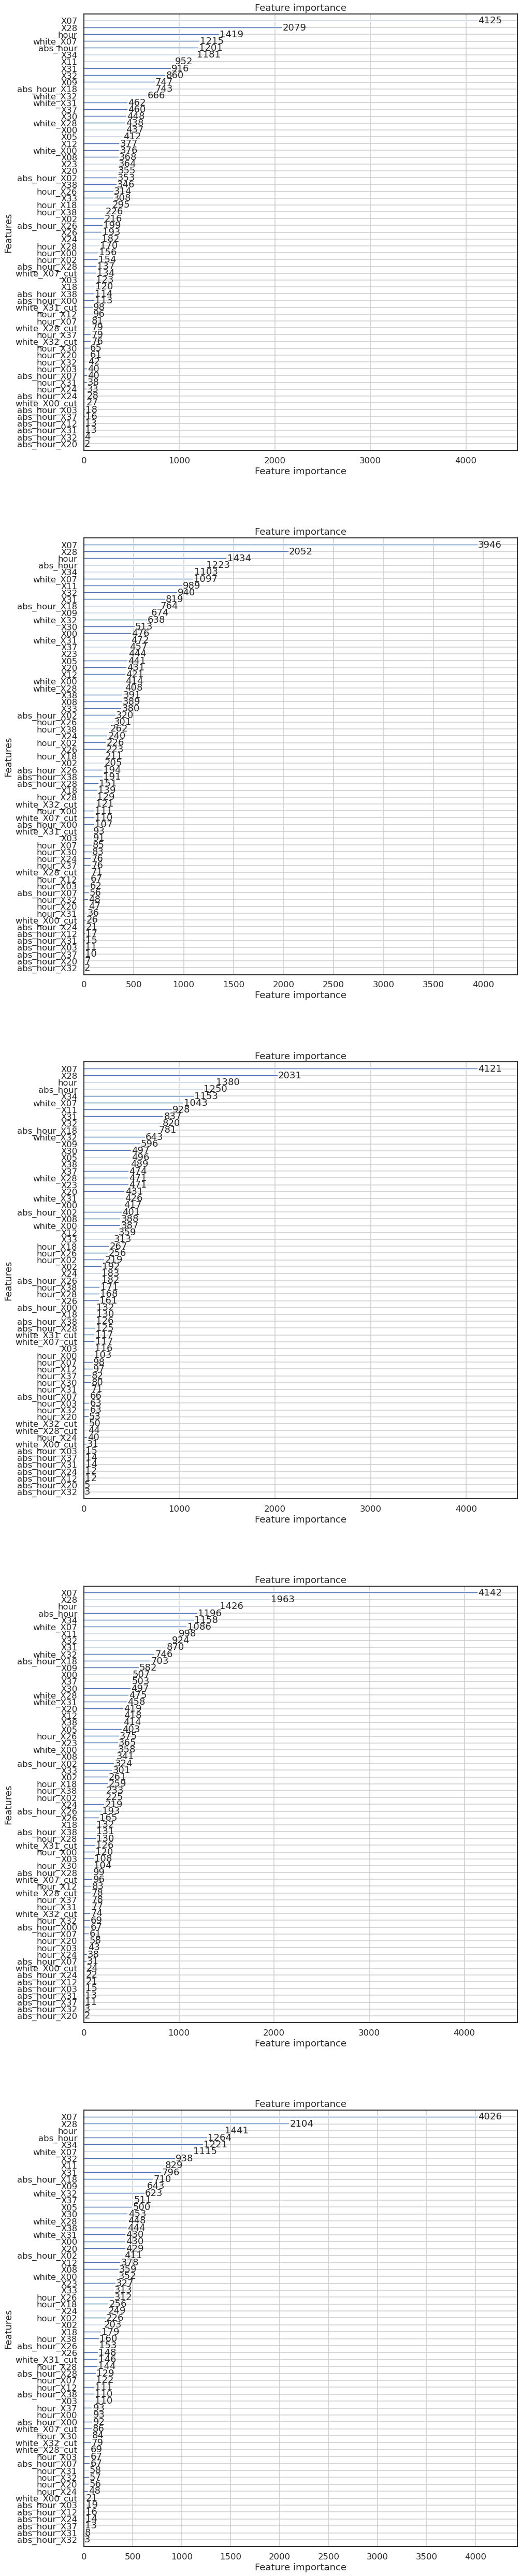

In [69]:
def plot_features(boosters,figsize):
    fig,axs=plt.subplots(5,1,figsize=figsize)
    for i,booster in zip(range(5),boosters):
        lgb.plot_importance(booster=boosters[i],ax=axs[i])
    plt.show()

plot_features(models,(15,90))

* 1 ~ 17


In [74]:
for col in ['Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08',
                      'Y09','Y10','Y11','Y12','Y13',
                     'Y14','Y15','Y16','Y17']:
    
    Y_train=train_1.loc[:,'Y00':'Y17'][col]
    Y_valid=train_3[col]

    result=param_tuning(5,10)
    best_param=best(result)
    best_param.update({
        'bagging_freq':5,
        'metric':'rmse',
        'objective':'regression',
        'verbosity':-1,
        'max_bin':15
    })
    
    avg_pred,_=lgb_fold(X_train,Y_train,X_test)
    
    cols_pred[col]=avg_pred

cols_pred=pd.DataFrame(cols_pred)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.158338	valid_1's rmse: 21.8273
[400]	training's rmse: 0.0829231	valid_1's rmse: 21.7808
[600]	training's rmse: 0.0486823	valid_1's rmse: 21.7581
[800]	training's rmse: 0.0337876	valid_1's rmse: 21.7471
[1000]	training's rmse: 0.027259	valid_1's rmse: 21.7413
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.027259	valid_1's rmse: 21.7413
|  1        | -3.376    |  0.7959   |  0.762    |  0.05588  |  0.03447  |  0.003674 |  6.085    |  41.06    |  41.3     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.137189	valid_1's rmse: 21.8164
[400]	training's rmse: 0.0650618	valid_1's rmse: 21.7719
[600]	training's rmse: 0.0382211	valid_1's rmse: 21.7535
[800]	training's rmse: 0.0285767	valid_1's rmse: 21.7456
[1000]	training's rmse: 0.024444	valid_1's rmse: 21.7426
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.024444	valid_1's rmse: 21.7426
|  2        | -3.41     |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.129138	valid_1's rmse: 21.8046
[400]	training's rmse: 0.06218	valid_1's rmse: 21.7642
[600]	training's rmse: 0.0412228	valid_1's rmse: 21.75
[800]	training's rmse: 0.0339893	valid_1's rmse: 21.7442
[1000]	training's rmse: 0.0306989	valid_1's rmse: 21.743
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0306989	valid_1's rmse: 21.743
|  3        | -3.381    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.169078	valid_1's rmse: 21.8341
[400]	training's rmse: 0.0929138	valid_1's rmse: 21.7879
[600]	training's rmse: 0.0551221	valid_1's rmse: 21.7638
[800]	training's rmse: 0.0371118	valid_1's rmse: 21.7511
[1000]	training's rmse: 0.0287534	valid_1's rmse: 21.744
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0287534	valid_1's rmse: 21.744
|  4        | -3.318    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.145394	valid_1's rmse: 21.82
[400]	training's rmse: 0.0719586	valid_1's rmse: 21.7758
[600]	training's rmse: 0.0424235	valid_1's rmse: 21.7561
[800]	training's rmse: 0.0308147	valid_1's rmse: 21.7476
[1000]	training's rmse: 0.0257651	valid_1's rmse: 21.7436
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0257651	valid_1's rmse: 21.7436
|  5        | -3.37     |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.144414	valid_1's rmse: 21.8183
[400]	training's rmse: 0.0714159	valid_1's rmse: 21.7746
[600]	training's rmse: 0.0426347	valid_1's rmse: 21.7545
[800]	training's rmse: 0.0317048	valid_1's rmse: 21.7459
[1000]	training's rmse: 0.0269628	valid_1's rmse: 21.7426
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0269628	valid_1's rmse: 21.7426
|  6        | -3.387    |  0.5042   |  0.6531   |  0.03438  |  0.03464  |  0.004206 |  7.545    |  36.7     |  58.67    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.127894	valid_1's rmse: 21.8102
[400]	training's rmse: 0.0588525	valid_1's rmse: 21.7669
[600]	training's rmse: 0.0358452	valid_1's rmse: 21.7505
[800]	training's rmse: 0.0279259	valid_1's rmse: 21.7438
[1000]	training's rmse: 0.0244145	valid_1's rmse: 21.742
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0244145	valid_1's rmse: 21.742
|  7        | -3.422    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.166518	valid_1's rmse: 21.8333
[400]	training's rmse: 0.0909261	valid_1's rmse: 21.7883
[600]	training's rmse: 0.0546803	valid_1's rmse: 21.7654
[800]	training's rmse: 0.0378804	valid_1's rmse: 21.7534
[1000]	training's rmse: 0.0300894	valid_1's rmse: 21.7471
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0300894	valid_1's rmse: 21.7471
|  8        | -3.265    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.14399	valid_1's rmse: 21.8179
[400]	training's rmse: 0.0720603	valid_1's rmse: 21.7736
[600]	training's rmse: 0.0445717	valid_1's rmse: 21.755
[800]	training's rmse: 0.0344629	valid_1's rmse: 21.7471
[1000]	training's rmse: 0.0299556	valid_1's rmse: 21.7441
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0299556	valid_1's rmse: 21.7441
|  9        | -3.345    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.172955	valid_1's rmse: 21.8345
[400]	training's rmse: 0.0977997	valid_1's rmse: 21.7902
[600]	training's rmse: 0.0604111	valid_1's rmse: 21.7666
[800]	training's rmse: 0.0427131	valid_1's rmse: 21.7541
[1000]	training's rmse: 0.0343886	valid_1's rmse: 21.7476
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0343886	valid_1's rmse: 21.7476
|  10       | -3.237    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.146483	valid_1's rmse: 21.8203
[400]	training's rmse: 0.0731875	valid_1's rmse: 21.776
[600]	training's rmse: 0.0436607	valid_1's rmse: 21.7561
[800]	training's rmse: 0.0320751	valid_1's rmse: 21.7476
[1000]	training's rmse: 0.0269902	valid_1's rmse: 21.7437
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0269902	valid_1's rmse: 21.7437
|  11       | -3.35     |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.134812	valid_1's rmse: 21.813
[400]	training's rmse: 0.063716	valid_1's rmse: 21.7695
[600]	training's rmse: 0.0380028	valid_1's rmse: 21.7522
[800]	training's rmse: 0.0287162	valid_1's rmse: 21.7449
[1000]	training's rmse: 0.0246774	valid_1's rmse: 21.742
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0246774	valid_1's rmse: 21.742
|  12       | -3.405    |  0.5759   |  0.6551   |  0.07373  |  0.04725  |  0.004582 |  7.275    |  36.86    |  57.93    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.155198	valid_1's rmse: 21.8209
[400]	training's rmse: 0.0813205	valid_1's rmse: 21.7764
[600]	training's rmse: 0.0497868	valid_1's rmse: 21.7556
[800]	training's rmse: 0.0370453	valid_1's rmse: 21.7462
[1000]	training's rmse: 0.0314564	valid_1's rmse: 21.7415
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0314564	valid_1's rmse: 21.7415
|  13       | -3.391    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.152608	valid_1's rmse: 21.825
[400]	training's rmse: 0.0773501	valid_1's rmse: 21.7794
[600]	training's rmse: 0.0446111	valid_1's rmse: 21.7581
[800]	training's rmse: 0.0310003	valid_1's rmse: 21.7478
[1000]	training's rmse: 0.0251596	valid_1's rmse: 21.7429
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0251596	valid_1's rmse: 21.7429
|  14       | -3.38     |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.148734	valid_1's rmse: 21.8202
[400]	training's rmse: 0.0757578	valid_1's rmse: 21.7768
[600]	training's rmse: 0.0464016	valid_1's rmse: 21.758
[800]	training's rmse: 0.0350006	valid_1's rmse: 21.7491
[1000]	training's rmse: 0.0300554	valid_1's rmse: 21.7453
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0300554	valid_1's rmse: 21.7453
|  15       | -3.326    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.128214	valid_1's rmse: 0.136768
[400]	training's rmse: 0.0599023	valid_1's rmse: 0.0691387
[600]	training's rmse: 0.0376061	valid_1's rmse: 0.046661
[800]	training's rmse: 0.0301089	valid_1's rmse: 0.0385472
[1000]	training's rmse: 0.0265651	valid_1's rmse: 0.0348463
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0265651	valid_1's rmse: 0.0348463
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.129692	valid_1's rmse: 0.1247
[400]	training's rmse: 0.0607489	valid_1's rmse: 0.0584122
[600]	training's rmse: 0.0381558	valid_1's rmse: 0.0374191
[800]	training's rmse: 0.0303709	valid_1's rmse: 0.0307052
[1000]	training's rmse: 0.0266734	valid_1's rmse: 0.0277388
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0266734	valid_1's rmse: 0.0277388
Training until validation scores don't improve for 100 rounds
[200]	trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.136015	valid_1's rmse: 21.7597
[400]	training's rmse: 0.0646824	valid_1's rmse: 21.7166
[600]	training's rmse: 0.0382327	valid_1's rmse: 21.6988
[800]	training's rmse: 0.0287227	valid_1's rmse: 21.6907
[1000]	training's rmse: 0.0245946	valid_1's rmse: 21.687
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0245946	valid_1's rmse: 21.687
|  2        | -3.316    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.127876	valid_1's rmse: 21.7501
[400]	training's rmse: 0.0617757	valid_1's rmse: 21.709
[600]	training's rmse: 0.041145	valid_1's rmse: 21.6934
[800]	training's rmse: 0.0341037	valid_1's rmse: 21.6869
[1000]	training's rmse: 0.0307126	valid_1's rmse: 21.6838
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0307126	valid_1's rmse: 21.6838
|  3        | -3.413    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.167594	valid_1's rmse: 21.7791
[400]	training's rmse: 0.0922195	valid_1's rmse: 21.7328
[600]	training's rmse: 0.0548158	valid_1's rmse: 21.7098
[800]	training's rmse: 0.0370309	valid_1's rmse: 21.6977
[1000]	training's rmse: 0.0288171	valid_1's rmse: 21.6908
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0288171	valid_1's rmse: 21.6908
|  4        | -3.223    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.144164	valid_1's rmse: 21.7649
[400]	training's rmse: 0.0715909	valid_1's rmse: 21.722
[600]	training's rmse: 0.042482	valid_1's rmse: 21.7026
[800]	training's rmse: 0.0310229	valid_1's rmse: 21.6929
[1000]	training's rmse: 0.0259752	valid_1's rmse: 21.6886
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0259752	valid_1's rmse: 21.6886
|  5        | -3.268    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.177663	valid_1's rmse: 21.7839
[400]	training's rmse: 0.102883	valid_1's rmse: 21.739
[600]	training's rmse: 0.0631427	valid_1's rmse: 21.7146
[800]	training's rmse: 0.0427066	valid_1's rmse: 21.7009
[1000]	training's rmse: 0.0325962	valid_1's rmse: 21.693
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0325962	valid_1's rmse: 21.693
|  6        | -3.161    |  0.6942   |  0.8      |  0.01     |  0.03135  |  0.003    |  6.27     |  36.34    |  59.58    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.178678	valid_1's rmse: 21.7836
[400]	training's rmse: 0.104643	valid_1's rmse: 21.7389
[600]	training's rmse: 0.0654382	valid_1's rmse: 21.7152
[800]	training's rmse: 0.0453908	valid_1's rmse: 21.7016
[1000]	training's rmse: 0.0354588	valid_1's rmse: 21.694
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0354588	valid_1's rmse: 21.694
|  7        | -3.13     |  0.7577   |  0.8      |  0.01     |  0.01     |  0.003    |  5.0      |  35.3     |  61.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.159759	valid_1's rmse: 21.7732
[400]	training's rmse: 0.085003	valid_1's rmse: 21.7284
[600]	training's rmse: 0.0505864	valid_1's rmse: 21.7066
[800]	training's rmse: 0.0354299	valid_1's rmse: 21.6951
[1000]	training's rmse: 0.0287559	valid_1's rmse: 21.6891
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0287559	valid_1's rmse: 21.6891
|  8        | -3.24     |  0.5485   |  0.5957   |  0.03697  |  0.08236  |  0.0036   |  6.249    |  31.65    |  60.95    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.178672	valid_1's rmse: 21.785
[400]	training's rmse: 0.104652	valid_1's rmse: 21.7401
[600]	training's rmse: 0.0654416	valid_1's rmse: 21.7161
[800]	training's rmse: 0.0454058	valid_1's rmse: 21.7024
[1000]	training's rmse: 0.0354053	valid_1's rmse: 21.6949
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0354053	valid_1's rmse: 21.6949
|  9        | -3.115    |  0.8      |  0.8      |  0.01     |  0.01     |  0.003    |  5.0      |  37.31    |  61.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.125125	valid_1's rmse: 21.7504
[400]	training's rmse: 0.0588413	valid_1's rmse: 21.7101
[600]	training's rmse: 0.037663	valid_1's rmse: 21.6945
[800]	training's rmse: 0.0303005	valid_1's rmse: 21.6876
[1000]	training's rmse: 0.0268462	valid_1's rmse: 21.6847
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0268462	valid_1's rmse: 21.6847
|  10       | -3.375    |  0.5      |  0.8      |  0.1      |  0.01     |  0.005    |  5.0      |  30.81    |  31.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.156615	valid_1's rmse: 21.7717
[400]	training's rmse: 0.0832265	valid_1's rmse: 21.7269
[600]	training's rmse: 0.0511122	valid_1's rmse: 21.7063
[800]	training's rmse: 0.0377867	valid_1's rmse: 21.6957
[1000]	training's rmse: 0.0319585	valid_1's rmse: 21.6902
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0319585	valid_1's rmse: 21.6902
|  11       | -3.233    |  0.6811   |  0.6388   |  0.03618  |  0.05873  |  0.003736 |  6.607    |  55.66    |  31.52    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.181062	valid_1's rmse: 21.7838
[400]	training's rmse: 0.108405	valid_1's rmse: 21.7394
[600]	training's rmse: 0.0707202	valid_1's rmse: 21.7152
[800]	training's rmse: 0.0523642	valid_1's rmse: 21.7011
[1000]	training's rmse: 0.0436851	valid_1's rmse: 21.6935
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0436851	valid_1's rmse: 21.6935
|  12       | -3.169    |  0.5      |  0.5      |  0.01     |  0.1      |  0.003    |  10.0     |  70.0     |  31.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.127857	valid_1's rmse: 21.7479
[400]	training's rmse: 0.063973	valid_1's rmse: 21.7067
[600]	training's rmse: 0.0449692	valid_1's rmse: 21.6914
[800]	training's rmse: 0.0387936	valid_1's rmse: 21.6853
[1000]	training's rmse: 0.0357641	valid_1's rmse: 21.6827
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0357641	valid_1's rmse: 21.6827
|  13       | -3.451    |  0.5      |  0.8      |  0.1      |  0.09016  |  0.005    |  5.0      |  70.0     |  37.57    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.180335	valid_1's rmse: 21.783
[400]	training's rmse: 0.107158	valid_1's rmse: 21.7385
[600]	training's rmse: 0.0690565	valid_1's rmse: 21.7143
[800]	training's rmse: 0.0504198	valid_1's rmse: 21.7001
[1000]	training's rmse: 0.0415658	valid_1's rmse: 21.6924
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0415658	valid_1's rmse: 21.6924
|  14       | -3.192    |  0.5489   |  0.5      |  0.01     |  0.0325   |  0.003    |  10.0     |  63.87    |  31.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.124713	valid_1's rmse: 21.7547
[400]	training's rmse: 0.0573096	valid_1's rmse: 21.7133
[600]	training's rmse: 0.0352466	valid_1's rmse: 21.6972
[800]	training's rmse: 0.0275718	valid_1's rmse: 21.6909
[1000]	training's rmse: 0.0239294	valid_1's rmse: 21.6881
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0239294	valid_1's rmse: 21.6881
|  15       | -3.293    |  0.7692   |  0.5      |  0.0984   |  0.1      |  0.005    |  10.0     |  46.26    |  32.78    |
Training until validation scores don't improve for 100 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.128617	valid_1's rmse: 0.138549
[400]	training's rmse: 0.0662218	valid_1's rmse: 0.0771791
[600]	training's rmse: 0.0485442	valid_1's rmse: 0.0591913
[800]	training's rmse: 0.0428512	valid_1's rmse: 0.0529981
[1000]	training's rmse: 0.0403407	valid_1's rmse: 0.050337
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0403407	valid_1's rmse: 0.050337
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.130527	valid_1's rmse: 0.1237
[400]	training's rmse: 0.0678775	valid_1's rmse: 0.0620489
[600]	training's rmse: 0.0500864	valid_1's rmse: 0.0451944
[800]	training's rmse: 0.0441115	valid_1's rmse: 0.0403517
[1000]	training's rmse: 0.0411007	valid_1's rmse: 0.0380787
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0411007	valid_1's rmse: 0.0380787
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.128937	valid_1's rmse: 0.133421
[400]	training's rm

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0628251	valid_1's rmse: 21.836
[400]	training's rmse: 0.0350512	valid_1's rmse: 21.8207
[600]	training's rmse: 0.0239007	valid_1's rmse: 21.8142
[800]	training's rmse: 0.0190355	valid_1's rmse: 21.8114
[1000]	training's rmse: 0.0165337	valid_1's rmse: 21.8099
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0165337	valid_1's rmse: 21.8099
|  2        | -1.306    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0614016	valid_1's rmse: 21.833
[400]	training's rmse: 0.0362613	valid_1's rmse: 21.818
[600]	training's rmse: 0.0268459	valid_1's rmse: 21.8119
[800]	training's rmse: 0.0227625	valid_1's rmse: 21.8099
[1000]	training's rmse: 0.0205244	valid_1's rmse: 21.809
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0205244	valid_1's rmse: 21.809
|  3        | -1.323    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0742786	valid_1's rmse: 21.8403
[400]	training's rmse: 0.0447062	valid_1's rmse: 21.8244
[600]	training's rmse: 0.0297777	valid_1's rmse: 21.8167
[800]	training's rmse: 0.022239	valid_1's rmse: 21.8127
[1000]	training's rmse: 0.0182069	valid_1's rmse: 21.8105
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0182069	valid_1's rmse: 21.8105
|  4        | -1.272    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0655661	valid_1's rmse: 21.8362
[400]	training's rmse: 0.0371559	valid_1's rmse: 21.8212
[600]	training's rmse: 0.0249694	valid_1's rmse: 21.8147
[800]	training's rmse: 0.0194583	valid_1's rmse: 21.8119
[1000]	training's rmse: 0.0165659	valid_1's rmse: 21.8103
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0165659	valid_1's rmse: 21.8103
|  5        | -1.286    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0654102	valid_1's rmse: 21.8364
[400]	training's rmse: 0.0377826	valid_1's rmse: 21.8219
[600]	training's rmse: 0.0263293	valid_1's rmse: 21.8152
[800]	training's rmse: 0.0211547	valid_1's rmse: 21.8124
[1000]	training's rmse: 0.0183512	valid_1's rmse: 21.8108
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0183512	valid_1's rmse: 21.8108
|  6        | -1.297    |  0.5767   |  0.5303   |  0.08233  |  0.06332  |  0.004305 |  6.386    |  37.18    |  59.59    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0741953	valid_1's rmse: 21.8412
[400]	training's rmse: 0.0462378	valid_1's rmse: 21.8252
[600]	training's rmse: 0.0328404	valid_1's rmse: 21.817
[800]	training's rmse: 0.0261931	valid_1's rmse: 21.8127
[1000]	training's rmse: 0.022526	valid_1's rmse: 21.8102
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.022526	valid_1's rmse: 21.8102
|  7        | -1.28     |  0.6372   |  0.5465   |  0.04019  |  0.01675  |  0.003547 |  5.377    |  40.99    |  41.09    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0696874	valid_1's rmse: 21.8391
[400]	training's rmse: 0.0407717	valid_1's rmse: 21.8231
[600]	training's rmse: 0.0275782	valid_1's rmse: 21.8157
[800]	training's rmse: 0.0213482	valid_1's rmse: 21.8121
[1000]	training's rmse: 0.0180701	valid_1's rmse: 21.8103
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0180701	valid_1's rmse: 21.8103
|  8        | -1.276    |  0.8      |  0.8      |  0.07311  |  0.05422  |  0.003767 |  6.868    |  41.15    |  41.52    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0738373	valid_1's rmse: 21.8402
[400]	training's rmse: 0.0452992	valid_1's rmse: 21.8244
[600]	training's rmse: 0.031403	valid_1's rmse: 21.8165
[800]	training's rmse: 0.0245627	valid_1's rmse: 21.8128
[1000]	training's rmse: 0.0207981	valid_1's rmse: 21.8105
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0207981	valid_1's rmse: 21.8105
|  9        | -1.263    |  0.6021   |  0.757    |  0.09093  |  0.03345  |  0.003472 |  6.034    |  41.87    |  42.4     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0733475	valid_1's rmse: 21.8414
[400]	training's rmse: 0.0452247	valid_1's rmse: 21.8248
[600]	training's rmse: 0.0317704	valid_1's rmse: 21.8165
[800]	training's rmse: 0.0250459	valid_1's rmse: 21.8121
[1000]	training's rmse: 0.0214026	valid_1's rmse: 21.8098
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0214026	valid_1's rmse: 21.8098
|  10       | -1.28     |  0.8      |  0.8      |  0.01299  |  0.01096  |  0.003533 |  5.801    |  41.19    |  42.62    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0773292	valid_1's rmse: 21.8427
[400]	training's rmse: 0.048668	valid_1's rmse: 21.8279
[600]	training's rmse: 0.0338876	valid_1's rmse: 21.8197
[800]	training's rmse: 0.0261797	valid_1's rmse: 21.8153
[1000]	training's rmse: 0.0218559	valid_1's rmse: 21.8124
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0218559	valid_1's rmse: 21.8124
|  11       | -1.238    |  0.6889   |  0.5534   |  0.09765  |  0.09399  |  0.0032   |  6.062    |  42.35    |  42.2     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0795798	valid_1's rmse: 21.8447
[400]	training's rmse: 0.0509124	valid_1's rmse: 21.8305
[600]	training's rmse: 0.0354844	valid_1's rmse: 21.8221
[800]	training's rmse: 0.0271985	valid_1's rmse: 21.8172
[1000]	training's rmse: 0.0225074	valid_1's rmse: 21.8143
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0225074	valid_1's rmse: 21.8143
|  12       | -1.205    |  0.7561   |  0.5      |  0.1      |  0.1      |  0.003018 |  6.075    |  42.67    |  42.03    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0623366	valid_1's rmse: 21.8342
[400]	training's rmse: 0.0353259	valid_1's rmse: 21.8192
[600]	training's rmse: 0.0247442	valid_1's rmse: 21.8127
[800]	training's rmse: 0.0201452	valid_1's rmse: 21.8103
[1000]	training's rmse: 0.0176508	valid_1's rmse: 21.8089
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0176508	valid_1's rmse: 21.8089
|  13       | -1.318    |  0.5847   |  0.7351   |  0.05041  |  0.06802  |  0.004585 |  6.354    |  42.77    |  41.98    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0730672	valid_1's rmse: 21.84
[400]	training's rmse: 0.0453417	valid_1's rmse: 21.8241
[600]	training's rmse: 0.0323285	valid_1's rmse: 21.8159
[800]	training's rmse: 0.0259586	valid_1's rmse: 21.8116
[1000]	training's rmse: 0.0225006	valid_1's rmse: 21.8094
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0225006	valid_1's rmse: 21.8094
|  14       | -1.294    |  0.6362   |  0.6238   |  0.08343  |  0.0109   |  0.003649 |  5.702    |  42.56    |  42.03    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0683617	valid_1's rmse: 21.8372
[400]	training's rmse: 0.0410894	valid_1's rmse: 21.8221
[600]	training's rmse: 0.0292889	valid_1's rmse: 21.8144
[800]	training's rmse: 0.0237966	valid_1's rmse: 21.8112
[1000]	training's rmse: 0.0208061	valid_1's rmse: 21.8096
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0208061	valid_1's rmse: 21.8096
|  15       | -1.31     |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.062084	valid_1's rmse: 0.0637902
[400]	training's rmse: 0.03732	valid_1's rmse: 0.0397842
[600]	training's rmse: 0.028139	valid_1's rmse: 0.030774
[800]	training's rmse: 0.0239681	valid_1's rmse: 0.0266793
[1000]	training's rmse: 0.0217345	valid_1's rmse: 0.0245087
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0217345	valid_1's rmse: 0.0245087
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.0620144	valid_1's rmse: 0.0618791
[400]	training's rmse: 0.0371779	valid_1's rmse: 0.0384791
[600]	training's rmse: 0.0277987	valid_1's rmse: 0.0300028
[800]	training's rmse: 0.0235972	valid_1's rmse: 0.0262901
[1000]	training's rmse: 0.0213939	valid_1's rmse: 0.0242671
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0213939	valid_1's rmse: 0.0242671
Training until validation scores don't improve for 100 rounds
[200]	train

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0645514	valid_1's rmse: 21.8358
[400]	training's rmse: 0.0360472	valid_1's rmse: 21.8203
[600]	training's rmse: 0.0245927	valid_1's rmse: 21.8132
[800]	training's rmse: 0.019602	valid_1's rmse: 21.8098
[1000]	training's rmse: 0.0170331	valid_1's rmse: 21.8081
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0170331	valid_1's rmse: 21.8081
|  2        | -1.42     |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0629736	valid_1's rmse: 21.8333
[400]	training's rmse: 0.0372309	valid_1's rmse: 21.8181
[600]	training's rmse: 0.0275524	valid_1's rmse: 21.8117
[800]	training's rmse: 0.0234073	valid_1's rmse: 21.8094
[1000]	training's rmse: 0.0211548	valid_1's rmse: 21.8083
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0211548	valid_1's rmse: 21.8083
|  3        | -1.423    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0763669	valid_1's rmse: 21.8404
[400]	training's rmse: 0.0458827	valid_1's rmse: 21.8239
[600]	training's rmse: 0.0305181	valid_1's rmse: 21.8157
[800]	training's rmse: 0.0227708	valid_1's rmse: 21.8114
[1000]	training's rmse: 0.0186537	valid_1's rmse: 21.8087
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0186537	valid_1's rmse: 21.8087
|  4        | -1.373    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.067335	valid_1's rmse: 21.8358
[400]	training's rmse: 0.0381104	valid_1's rmse: 21.8205
[600]	training's rmse: 0.025587	valid_1's rmse: 21.8134
[800]	training's rmse: 0.0198863	valid_1's rmse: 21.8102
[1000]	training's rmse: 0.0168769	valid_1's rmse: 21.8084
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0168769	valid_1's rmse: 21.8084
|  5        | -1.4      |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0672164	valid_1's rmse: 21.8353
[400]	training's rmse: 0.0384022	valid_1's rmse: 21.8186
[600]	training's rmse: 0.0262252	valid_1's rmse: 21.8114
[800]	training's rmse: 0.0207573	valid_1's rmse: 21.8081
[1000]	training's rmse: 0.0177549	valid_1's rmse: 21.8064
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0177549	valid_1's rmse: 21.8064
|  6        | -1.432    |  0.5042   |  0.6531   |  0.03438  |  0.03464  |  0.004206 |  7.545    |  36.7     |  58.67    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.061173	valid_1's rmse: 21.8338
[400]	training's rmse: 0.0338765	valid_1's rmse: 21.8189
[600]	training's rmse: 0.0236188	valid_1's rmse: 21.8125
[800]	training's rmse: 0.0192527	valid_1's rmse: 21.8098
[1000]	training's rmse: 0.0168736	valid_1's rmse: 21.8082
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0168736	valid_1's rmse: 21.8082
|  7        | -1.426    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0758982	valid_1's rmse: 21.841
[400]	training's rmse: 0.0459765	valid_1's rmse: 21.8255
[600]	training's rmse: 0.0312345	valid_1's rmse: 21.8174
[800]	training's rmse: 0.0238902	valid_1's rmse: 21.8131
[1000]	training's rmse: 0.019842	valid_1's rmse: 21.8104
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.019842	valid_1's rmse: 21.8104
|  8        | -1.357    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0677666	valid_1's rmse: 21.8353
[400]	training's rmse: 0.039752	valid_1's rmse: 21.8193
[600]	training's rmse: 0.0281788	valid_1's rmse: 21.8122
[800]	training's rmse: 0.0228792	valid_1's rmse: 21.8089
[1000]	training's rmse: 0.0200543	valid_1's rmse: 21.8071
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0200543	valid_1's rmse: 21.8071
|  9        | -1.423    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0786166	valid_1's rmse: 21.8408
[400]	training's rmse: 0.0490961	valid_1's rmse: 21.8244
[600]	training's rmse: 0.0341355	valid_1's rmse: 21.8158
[800]	training's rmse: 0.0264898	valid_1's rmse: 21.811
[1000]	training's rmse: 0.0221175	valid_1's rmse: 21.808
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0221175	valid_1's rmse: 21.808
|  10       | -1.381    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0679465	valid_1's rmse: 21.836
[400]	training's rmse: 0.0388824	valid_1's rmse: 21.8199
[600]	training's rmse: 0.0264157	valid_1's rmse: 21.813
[800]	training's rmse: 0.0206913	valid_1's rmse: 21.8096
[1000]	training's rmse: 0.0176258	valid_1's rmse: 21.8077
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0176258	valid_1's rmse: 21.8077
|  11       | -1.41     |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.0670295	valid_1's rmse: 21.8365
[400]	training's rmse: 0.0382196	valid_1's rmse: 21.8212
[600]	training's rmse: 0.0262089	valid_1's rmse: 21.8141
[800]	training's rmse: 0.0207707	valid_1's rmse: 21.8105
[1000]	training's rmse: 0.0179109	valid_1's rmse: 21.8085
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0179109	valid_1's rmse: 21.8085
|  12       | -1.405    |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0717785	valid_1's rmse: 21.8369
[400]	training's rmse: 0.0428681	valid_1's rmse: 21.8201
[600]	training's rmse: 0.0298245	valid_1's rmse: 21.8122
[800]	training's rmse: 0.0236811	valid_1's rmse: 21.8083
[1000]	training's rmse: 0.0201594	valid_1's rmse: 21.8064
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0201594	valid_1's rmse: 21.8064
|  13       | -1.437    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0700526	valid_1's rmse: 21.838
[400]	training's rmse: 0.0400382	valid_1's rmse: 21.822
[600]	training's rmse: 0.0264401	valid_1's rmse: 21.8143
[800]	training's rmse: 0.0200981	valid_1's rmse: 21.8105
[1000]	training's rmse: 0.0168058	valid_1's rmse: 21.8084
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0168058	valid_1's rmse: 21.8084
|  14       | -1.41     |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0701187	valid_1's rmse: 21.8377
[400]	training's rmse: 0.0421296	valid_1's rmse: 21.8219
[600]	training's rmse: 0.0300304	valid_1's rmse: 21.8145
[800]	training's rmse: 0.0243945	valid_1's rmse: 21.8106
[1000]	training's rmse: 0.0213675	valid_1's rmse: 21.8088
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0213675	valid_1's rmse: 21.8088
|  15       | -1.395    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |
Training until validation scores don't improve for 100 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.0727904	valid_1's rmse: 0.0739992
[400]	training's rmse: 0.0443222	valid_1's rmse: 0.0462368
[600]	training's rmse: 0.0317549	valid_1's rmse: 0.0340183
[800]	training's rmse: 0.0255718	valid_1's rmse: 0.0280667
[1000]	training's rmse: 0.0220301	valid_1's rmse: 0.0247526
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0220301	valid_1's rmse: 0.0247526
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.0728908	valid_1's rmse: 0.0721476
[400]	training's rmse: 0.0444753	valid_1's rmse: 0.0449957
[600]	training's rmse: 0.0317357	valid_1's rmse: 0.0332356
[800]	training's rmse: 0.0255715	valid_1's rmse: 0.0277404
[1000]	training's rmse: 0.0220732	valid_1's rmse: 0.0246702
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0220732	valid_1's rmse: 0.0246702
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.0722468	valid_1's rmse: 0.0761653
[400]	tra

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.149221	valid_1's rmse: 22.4331
[400]	training's rmse: 0.0748582	valid_1's rmse: 22.3844
[600]	training's rmse: 0.0477518	valid_1's rmse: 22.3623
[800]	training's rmse: 0.0379921	valid_1's rmse: 22.3527
[1000]	training's rmse: 0.0336948	valid_1's rmse: 22.3485
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0336948	valid_1's rmse: 22.3485
|  2        | -4.372    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.142055	valid_1's rmse: 22.4288
[400]	training's rmse: 0.0734963	valid_1's rmse: 22.3785
[600]	training's rmse: 0.0518712	valid_1's rmse: 22.3594
[800]	training's rmse: 0.0446006	valid_1's rmse: 22.3512
[1000]	training's rmse: 0.0411788	valid_1's rmse: 22.3476
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0411788	valid_1's rmse: 22.3476
|  3        | -4.448    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.182045	valid_1's rmse: 22.4547
[400]	training's rmse: 0.103026	valid_1's rmse: 22.4045
[600]	training's rmse: 0.064209	valid_1's rmse: 22.3766
[800]	training's rmse: 0.0458593	valid_1's rmse: 22.3619
[1000]	training's rmse: 0.0373244	valid_1's rmse: 22.3532
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0373244	valid_1's rmse: 22.3532
|  4        | -4.269    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.157606	valid_1's rmse: 22.4379
[400]	training's rmse: 0.0816472	valid_1's rmse: 22.3875
[600]	training's rmse: 0.0514899	valid_1's rmse: 22.3646
[800]	training's rmse: 0.0396382	valid_1's rmse: 22.3536
[1000]	training's rmse: 0.0342895	valid_1's rmse: 22.3484
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0342895	valid_1's rmse: 22.3484
|  5        | -4.378    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.14161	valid_1's rmse: 22.4318
[400]	training's rmse: 0.0682423	valid_1's rmse: 22.3836
[600]	training's rmse: 0.0427902	valid_1's rmse: 22.3616
[800]	training's rmse: 0.0336573	valid_1's rmse: 22.3528
[1000]	training's rmse: 0.0294872	valid_1's rmse: 22.3493
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0294872	valid_1's rmse: 22.3493
|  6        | -4.363    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.139738	valid_1's rmse: 22.4264
[400]	training's rmse: 0.0687431	valid_1's rmse: 22.3794
[600]	training's rmse: 0.0454693	valid_1's rmse: 22.3594
[800]	training's rmse: 0.0374156	valid_1's rmse: 22.3511
[1000]	training's rmse: 0.0336756	valid_1's rmse: 22.3474
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0336756	valid_1's rmse: 22.3474
|  7        | -4.424    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.179425	valid_1's rmse: 22.4502
[400]	training's rmse: 0.101147	valid_1's rmse: 22.4006
[600]	training's rmse: 0.0639395	valid_1's rmse: 22.3743
[800]	training's rmse: 0.046929	valid_1's rmse: 22.3606
[1000]	training's rmse: 0.038986	valid_1's rmse: 22.3526
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.038986	valid_1's rmse: 22.3526
|  8        | -4.271    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.156841	valid_1's rmse: 22.4392
[400]	training's rmse: 0.082815	valid_1's rmse: 22.3888
[600]	training's rmse: 0.0548549	valid_1's rmse: 22.3651
[800]	training's rmse: 0.0444362	valid_1's rmse: 22.3542
[1000]	training's rmse: 0.0397301	valid_1's rmse: 22.3489
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0397301	valid_1's rmse: 22.3489
|  9        | -4.349    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.16912	valid_1's rmse: 22.446
[400]	training's rmse: 0.0914041	valid_1's rmse: 22.3957
[600]	training's rmse: 0.0573413	valid_1's rmse: 22.3707
[800]	training's rmse: 0.0428971	valid_1's rmse: 22.358
[1000]	training's rmse: 0.0364825	valid_1's rmse: 22.3514
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0364825	valid_1's rmse: 22.3514
|  10       | -4.285    |  0.586    |  0.6595   |  0.05586  |  0.01965  |  0.003753 |  7.986    |  36.33    |  46.8     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.192529	valid_1's rmse: 22.4617
[400]	training's rmse: 0.113876	valid_1's rmse: 22.4131
[600]	training's rmse: 0.072165	valid_1's rmse: 22.3843
[800]	training's rmse: 0.0508528	valid_1's rmse: 22.3675
[1000]	training's rmse: 0.0403138	valid_1's rmse: 22.3572
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0403138	valid_1's rmse: 22.3572
|  11       | -4.188    |  0.6654   |  0.7324   |  0.01     |  0.04467  |  0.003    |  7.021    |  36.67    |  58.41    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.181533	valid_1's rmse: 22.4552
[400]	training's rmse: 0.102549	valid_1's rmse: 22.4064
[600]	training's rmse: 0.0638365	valid_1's rmse: 22.3797
[800]	training's rmse: 0.0456148	valid_1's rmse: 22.3648
[1000]	training's rmse: 0.0370958	valid_1's rmse: 22.3566
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0370958	valid_1's rmse: 22.3566
|  12       | -4.159    |  0.6955   |  0.7085   |  0.05532  |  0.05438  |  0.003331 |  7.336    |  36.99    |  59.22    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.192853	valid_1's rmse: 22.4614
[400]	training's rmse: 0.114441	valid_1's rmse: 22.4121
[600]	training's rmse: 0.0729814	valid_1's rmse: 22.3824
[800]	training's rmse: 0.0519266	valid_1's rmse: 22.3652
[1000]	training's rmse: 0.0415925	valid_1's rmse: 22.3557
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0415925	valid_1's rmse: 22.3557
|  13       | -4.211    |  0.6938   |  0.7679   |  0.01581  |  0.03912  |  0.003    |  6.637    |  36.61    |  59.36    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.193331	valid_1's rmse: 22.461
[400]	training's rmse: 0.115045	valid_1's rmse: 22.413
[600]	training's rmse: 0.0736408	valid_1's rmse: 22.3852
[800]	training's rmse: 0.0524324	valid_1's rmse: 22.3687
[1000]	training's rmse: 0.0418321	valid_1's rmse: 22.3588
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0418321	valid_1's rmse: 22.3588
|  14       | -4.112    |  0.6938   |  0.6377   |  0.1      |  0.07188  |  0.003    |  7.588    |  36.46    |  59.12    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.194482	valid_1's rmse: 22.4596
[400]	training's rmse: 0.116758	valid_1's rmse: 22.4112
[600]	training's rmse: 0.0758847	valid_1's rmse: 22.3835
[800]	training's rmse: 0.0550401	valid_1's rmse: 22.3672
[1000]	training's rmse: 0.0445557	valid_1's rmse: 22.3579
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0445557	valid_1's rmse: 22.3579
|  15       | -4.138    |  0.5634   |  0.5      |  0.0865   |  0.1      |  0.003    |  8.03     |  36.09    |  59.42    |
Training until validation scores don't improve for 100 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.142974	valid_1's rmse: 0.147561
[400]	training's rmse: 0.0745877	valid_1's rmse: 0.0799563
[600]	training's rmse: 0.053015	valid_1's rmse: 0.0587345
[800]	training's rmse: 0.0457273	valid_1's rmse: 0.0517754
[1000]	training's rmse: 0.0422385	valid_1's rmse: 0.0487993
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0422385	valid_1's rmse: 0.0487993
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.144214	valid_1's rmse: 0.136484
[400]	training's rmse: 0.0760074	valid_1's rmse: 0.071233
[600]	training's rmse: 0.0546454	valid_1's rmse: 0.0528519
[800]	training's rmse: 0.0473454	valid_1's rmse: 0.0473524
[1000]	training's rmse: 0.0437469	valid_1's rmse: 0.0449864
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0437469	valid_1's rmse: 0.0449864
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.142378	valid_1's rmse: 0.14958
[400]	training's r

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.149093	valid_1's rmse: 21.2612
[400]	training's rmse: 0.077477	valid_1's rmse: 21.2192
[600]	training's rmse: 0.0511586	valid_1's rmse: 21.2008
[800]	training's rmse: 0.0412088	valid_1's rmse: 21.1914
[1000]	training's rmse: 0.036574	valid_1's rmse: 21.1861
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.036574	valid_1's rmse: 21.1861
|  2        | -3.316    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.14252	valid_1's rmse: 21.2565
[400]	training's rmse: 0.0760364	valid_1's rmse: 21.2147
[600]	training's rmse: 0.0546958	valid_1's rmse: 21.1972
[800]	training's rmse: 0.0471409	valid_1's rmse: 21.1894
[1000]	training's rmse: 0.043486	valid_1's rmse: 21.1849
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.043486	valid_1's rmse: 21.1849
|  3        | -3.312    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.180722	valid_1's rmse: 21.2786
[400]	training's rmse: 0.104238	valid_1's rmse: 21.2363
[600]	training's rmse: 0.0668703	valid_1's rmse: 21.214
[800]	training's rmse: 0.0491517	valid_1's rmse: 21.2013
[1000]	training's rmse: 0.0406813	valid_1's rmse: 21.1943
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0406813	valid_1's rmse: 21.1943
|  4        | -3.26     |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.156523	valid_1's rmse: 21.2671
[400]	training's rmse: 0.0828603	valid_1's rmse: 21.2258
[600]	training's rmse: 0.0537944	valid_1's rmse: 21.2069
[800]	training's rmse: 0.0421768	valid_1's rmse: 21.1967
[1000]	training's rmse: 0.0367895	valid_1's rmse: 21.1909
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0367895	valid_1's rmse: 21.1909
|  5        | -3.261    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.169058	valid_1's rmse: 21.2746
[400]	training's rmse: 0.0930178	valid_1's rmse: 21.2319
[600]	training's rmse: 0.0590069	valid_1's rmse: 21.2106
[800]	training's rmse: 0.0441373	valid_1's rmse: 21.1988
[1000]	training's rmse: 0.0372188	valid_1's rmse: 21.1924
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0372188	valid_1's rmse: 21.1924
|  6        | -3.261    |  0.6422   |  0.5721   |  0.09177  |  0.0716   |  0.003698 |  9.822    |  33.78    |  58.03    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.139869	valid_1's rmse: 21.2552
[400]	training's rmse: 0.072816	valid_1's rmse: 21.2142
[600]	training's rmse: 0.0515059	valid_1's rmse: 21.1972
[800]	training's rmse: 0.0437699	valid_1's rmse: 21.189
[1000]	training's rmse: 0.0399944	valid_1's rmse: 21.1837
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0399944	valid_1's rmse: 21.1837
|  7        | -3.353    |  0.5      |  0.8      |  0.1      |  0.03302  |  0.005    |  5.057    |  32.53    |  55.91    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.180578	valid_1's rmse: 21.2807
[400]	training's rmse: 0.103901	valid_1's rmse: 21.2379
[600]	training's rmse: 0.0661281	valid_1's rmse: 21.2154
[800]	training's rmse: 0.0481332	valid_1's rmse: 21.2023
[1000]	training's rmse: 0.0394809	valid_1's rmse: 21.1945
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0394809	valid_1's rmse: 21.1945
|  8        | -3.254    |  0.6705   |  0.5974   |  0.04985  |  0.06835  |  0.00331  |  9.331    |  36.07    |  58.15    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.135515	valid_1's rmse: 21.2535
[400]	training's rmse: 0.0666734	valid_1's rmse: 21.2146
[600]	training's rmse: 0.0441931	valid_1's rmse: 21.198
[800]	training's rmse: 0.0360115	valid_1's rmse: 21.1898
[1000]	training's rmse: 0.0318501	valid_1's rmse: 21.1856
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0318501	valid_1's rmse: 21.1856
|  9        | -3.334    |  0.7026   |  0.6564   |  0.1      |  0.01968  |  0.005    |  8.877    |  38.64    |  59.16    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.19074	valid_1's rmse: 21.2853
[400]	training's rmse: 0.114481	valid_1's rmse: 21.2429
[600]	training's rmse: 0.0740656	valid_1's rmse: 21.2195
[800]	training's rmse: 0.0534317	valid_1's rmse: 21.2054
[1000]	training's rmse: 0.043056	valid_1's rmse: 21.1971
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.043056	valid_1's rmse: 21.1971
|  10       | -3.231    |  0.6415   |  0.6208   |  0.02974  |  0.07639  |  0.003    |  8.572    |  35.59    |  57.45    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.189906	valid_1's rmse: 21.285
[400]	training's rmse: 0.112828	valid_1's rmse: 21.242
[600]	training's rmse: 0.0716457	valid_1's rmse: 21.2187
[800]	training's rmse: 0.0504455	valid_1's rmse: 21.2057
[1000]	training's rmse: 0.0397002	valid_1's rmse: 21.1974
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0397002	valid_1's rmse: 21.1974
|  11       | -3.264    |  0.8      |  0.8      |  0.01     |  0.1      |  0.003    |  9.074    |  35.23    |  56.64    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.164126	valid_1's rmse: 21.2712
[400]	training's rmse: 0.0883863	valid_1's rmse: 21.2281
[600]	training's rmse: 0.0558006	valid_1's rmse: 21.2068
[800]	training's rmse: 0.0421507	valid_1's rmse: 21.1955
[1000]	training's rmse: 0.0359397	valid_1's rmse: 21.1895
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0359397	valid_1's rmse: 21.1895
|  12       | -3.3      |  0.651    |  0.5068   |  0.02134  |  0.03736  |  0.003856 |  8.111    |  35.56    |  58.29    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.162719	valid_1's rmse: 21.2705
[400]	training's rmse: 0.0876787	valid_1's rmse: 21.2283
[600]	training's rmse: 0.0560887	valid_1's rmse: 21.2079
[800]	training's rmse: 0.0429443	valid_1's rmse: 21.1968
[1000]	training's rmse: 0.0368569	valid_1's rmse: 21.1909
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0368569	valid_1's rmse: 21.1909
|  13       | -3.283    |  0.6261   |  0.5768   |  0.07928  |  0.09697  |  0.003931 |  8.661    |  35.79    |  56.94    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.160585	valid_1's rmse: 21.2694
[400]	training's rmse: 0.0850993	valid_1's rmse: 21.2271
[600]	training's rmse: 0.0533227	valid_1's rmse: 21.2072
[800]	training's rmse: 0.0402808	valid_1's rmse: 21.1965
[1000]	training's rmse: 0.0342421	valid_1's rmse: 21.191
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0342421	valid_1's rmse: 21.191
|  14       | -3.272    |  0.7399   |  0.6081   |  0.08213  |  0.04855  |  0.00397  |  8.84     |  35.98    |  56.88    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.161766	valid_1's rmse: 21.2672
[400]	training's rmse: 0.0892585	valid_1's rmse: 21.2246
[600]	training's rmse: 0.0602477	valid_1's rmse: 21.2051
[800]	training's rmse: 0.048672	valid_1's rmse: 21.1941
[1000]	training's rmse: 0.043496	valid_1's rmse: 21.1878
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.043496	valid_1's rmse: 21.1878
|  15       | -3.26     |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.139473	valid_1's rmse: 0.148583
[400]	training's rmse: 0.073385	valid_1's rmse: 0.081963
[600]	training's rmse: 0.0523407	valid_1's rmse: 0.0611094
[800]	training's rmse: 0.0449093	valid_1's rmse: 0.0540895
[1000]	training's rmse: 0.0411937	valid_1's rmse: 0.0507495
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0411937	valid_1's rmse: 0.0507495
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.14111	valid_1's rmse: 0.136389
[400]	training's rmse: 0.0741925	valid_1's rmse: 0.0750915
[600]	training's rmse: 0.0527437	valid_1's rmse: 0.0567299
[800]	training's rmse: 0.0450796	valid_1's rmse: 0.0504636
[1000]	training's rmse: 0.0412754	valid_1's rmse: 0.0477536
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0412754	valid_1's rmse: 0.0477536
Training until validation scores don't improve for 100 rounds
[200]	trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.157412	valid_1's rmse: 21.6644
[400]	training's rmse: 0.0846185	valid_1's rmse: 21.6249
[600]	training's rmse: 0.0580362	valid_1's rmse: 21.6079
[800]	training's rmse: 0.0474389	valid_1's rmse: 21.6001
[1000]	training's rmse: 0.0421873	valid_1's rmse: 21.5955
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0421873	valid_1's rmse: 21.5955
|  2        | -4.687    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.151111	valid_1's rmse: 21.6584
[400]	training's rmse: 0.0839468	valid_1's rmse: 21.6171
[600]	training's rmse: 0.0621184	valid_1's rmse: 21.6033
[800]	training's rmse: 0.0538997	valid_1's rmse: 21.5962
[1000]	training's rmse: 0.0498193	valid_1's rmse: 21.5912
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0498193	valid_1's rmse: 21.5912
|  3        | -4.823    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.189597	valid_1's rmse: 21.6807
[400]	training's rmse: 0.111267	valid_1's rmse: 21.6387
[600]	training's rmse: 0.0733042	valid_1's rmse: 21.6181
[800]	training's rmse: 0.0552999	valid_1's rmse: 21.6064
[1000]	training's rmse: 0.0463235	valid_1's rmse: 21.5995
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0463235	valid_1's rmse: 21.5995
|  4        | -4.628    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.164992	valid_1's rmse: 21.6691
[400]	training's rmse: 0.0898284	valid_1's rmse: 21.6277
[600]	training's rmse: 0.060031	valid_1's rmse: 21.6107
[800]	training's rmse: 0.0477364	valid_1's rmse: 21.6025
[1000]	training's rmse: 0.0417669	valid_1's rmse: 21.5977
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0417669	valid_1's rmse: 21.5977
|  5        | -4.68     |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.181152	valid_1's rmse: 21.6752
[400]	training's rmse: 0.104637	valid_1's rmse: 21.6332
[600]	training's rmse: 0.0704582	valid_1's rmse: 21.6134
[800]	training's rmse: 0.0551658	valid_1's rmse: 21.604
[1000]	training's rmse: 0.0478434	valid_1's rmse: 21.5973
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0478434	valid_1's rmse: 21.5973
|  6        | -4.673    |  0.5667   |  0.6999   |  0.07266  |  0.04069  |  0.003632 |  6.558    |  35.84    |  58.98    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.199328	valid_1's rmse: 21.685
[400]	training's rmse: 0.120707	valid_1's rmse: 21.6426
[600]	training's rmse: 0.0794898	valid_1's rmse: 21.6194
[800]	training's rmse: 0.0583972	valid_1's rmse: 21.6072
[1000]	training's rmse: 0.0474542	valid_1's rmse: 21.5995
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0474542	valid_1's rmse: 21.5995
|  7        | -4.596    |  0.8      |  0.8      |  0.01     |  0.03997  |  0.003    |  7.178    |  37.91    |  58.38    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.199372	valid_1's rmse: 21.6853
[400]	training's rmse: 0.120823	valid_1's rmse: 21.643
[600]	training's rmse: 0.0796913	valid_1's rmse: 21.6199
[800]	training's rmse: 0.058639	valid_1's rmse: 21.6077
[1000]	training's rmse: 0.0477016	valid_1's rmse: 21.5998
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0477016	valid_1's rmse: 21.5998
|  8        | -4.601    |  0.8      |  0.8      |  0.01     |  0.01321  |  0.003    |  7.849    |  38.84    |  59.34    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.200515	valid_1's rmse: 21.6847
[400]	training's rmse: 0.122883	valid_1's rmse: 21.6418
[600]	training's rmse: 0.0824559	valid_1's rmse: 21.6206
[800]	training's rmse: 0.0618555	valid_1's rmse: 21.6088
[1000]	training's rmse: 0.0511817	valid_1's rmse: 21.6017
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0511817	valid_1's rmse: 21.6017
|  9        | -4.579    |  0.8      |  0.8      |  0.01     |  0.05317  |  0.003    |  6.184    |  39.49    |  58.53    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.190087	valid_1's rmse: 21.6821
[400]	training's rmse: 0.114636	valid_1's rmse: 21.6383
[600]	training's rmse: 0.0794714	valid_1's rmse: 21.6172
[800]	training's rmse: 0.063337	valid_1's rmse: 21.6059
[1000]	training's rmse: 0.0554274	valid_1's rmse: 21.5987
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0554274	valid_1's rmse: 21.5987
|  10       | -4.612    |  0.5366   |  0.5782   |  0.03636  |  0.08419  |  0.003429 |  5.548    |  40.88    |  60.11    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.202669	valid_1's rmse: 21.6844
[400]	training's rmse: 0.126843	valid_1's rmse: 21.6405
[600]	training's rmse: 0.0873203	valid_1's rmse: 21.6177
[800]	training's rmse: 0.0670985	valid_1's rmse: 21.605
[1000]	training's rmse: 0.0563529	valid_1's rmse: 21.5984
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0563529	valid_1's rmse: 21.5984
|  11       | -4.57     |  0.8      |  0.8      |  0.01     |  0.01     |  0.003    |  5.0      |  39.87    |  57.1     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.20273	valid_1's rmse: 21.6844
[400]	training's rmse: 0.126989	valid_1's rmse: 21.6407
[600]	training's rmse: 0.0875409	valid_1's rmse: 21.6182
[800]	training's rmse: 0.0673415	valid_1's rmse: 21.6059
[1000]	training's rmse: 0.0566403	valid_1's rmse: 21.5996
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0566403	valid_1's rmse: 21.5996
|  12       | -4.544    |  0.8      |  0.8      |  0.01     |  0.01     |  0.003    |  5.0      |  41.85    |  57.04    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.173234	valid_1's rmse: 21.6711
[400]	training's rmse: 0.0988651	valid_1's rmse: 21.6296
[600]	training's rmse: 0.0683602	valid_1's rmse: 21.6114
[800]	training's rmse: 0.0556344	valid_1's rmse: 21.6022
[1000]	training's rmse: 0.0495991	valid_1's rmse: 21.5965
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0495991	valid_1's rmse: 21.5965
|  13       | -4.702    |  0.5239   |  0.6698   |  0.04441  |  0.05583  |  0.003943 |  6.565    |  43.02    |  56.91    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.166191	valid_1's rmse: 21.6669
[400]	training's rmse: 0.0940134	valid_1's rmse: 21.624
[600]	training's rmse: 0.0665649	valid_1's rmse: 21.6071
[800]	training's rmse: 0.0553712	valid_1's rmse: 21.5987
[1000]	training's rmse: 0.0500385	valid_1's rmse: 21.5923
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0500385	valid_1's rmse: 21.5923
|  14       | -4.757    |  0.5339   |  0.7242   |  0.04875  |  0.06642  |  0.004255 |  5.29     |  40.8     |  57.91    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.170642	valid_1's rmse: 21.671
[400]	training's rmse: 0.0973344	valid_1's rmse: 21.6282
[600]	training's rmse: 0.0680372	valid_1's rmse: 21.6102
[800]	training's rmse: 0.0558206	valid_1's rmse: 21.6009
[1000]	training's rmse: 0.0499928	valid_1's rmse: 21.5951
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0499928	valid_1's rmse: 21.5951
|  15       | -4.702    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.151057	valid_1's rmse: 0.161404
[400]	training's rmse: 0.0844103	valid_1's rmse: 0.0947602
[600]	training's rmse: 0.0632731	valid_1's rmse: 0.0744035
[800]	training's rmse: 0.0557552	valid_1's rmse: 0.067616
[1000]	training's rmse: 0.0519078	valid_1's rmse: 0.0641877
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0519078	valid_1's rmse: 0.0641877
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.152898	valid_1's rmse: 0.148864
[400]	training's rmse: 0.085069	valid_1's rmse: 0.0861725
[600]	training's rmse: 0.0633578	valid_1's rmse: 0.0679552
[800]	training's rmse: 0.055431	valid_1's rmse: 0.0621928
[1000]	training's rmse: 0.0513864	valid_1's rmse: 0.0596483
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0513864	valid_1's rmse: 0.0596483
Training until validation scores don't improve for 100 rounds
[200]	trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.166083	valid_1's rmse: 22.1939
[400]	training's rmse: 0.0845727	valid_1's rmse: 22.1493
[600]	training's rmse: 0.055449	valid_1's rmse: 22.1283
[800]	training's rmse: 0.0447139	valid_1's rmse: 22.1188
[1000]	training's rmse: 0.0396513	valid_1's rmse: 22.1143
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0396513	valid_1's rmse: 22.1143
|  2        | -4.542    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.157384	valid_1's rmse: 22.188
[400]	training's rmse: 0.0826566	valid_1's rmse: 22.1437
[600]	training's rmse: 0.0597474	valid_1's rmse: 22.1254
[800]	training's rmse: 0.0516271	valid_1's rmse: 22.1177
[1000]	training's rmse: 0.0476239	valid_1's rmse: 22.1145
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0476239	valid_1's rmse: 22.1145
|  3        | -4.538    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.202621	valid_1's rmse: 22.2126
[400]	training's rmse: 0.115526	valid_1's rmse: 22.1665
[600]	training's rmse: 0.0731809	valid_1's rmse: 22.1417
[800]	training's rmse: 0.0532974	valid_1's rmse: 22.1278
[1000]	training's rmse: 0.0439707	valid_1's rmse: 22.1199
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0439707	valid_1's rmse: 22.1199
|  4        | -4.446    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.175233	valid_1's rmse: 22.1987
[400]	training's rmse: 0.0919046	valid_1's rmse: 22.1545
[600]	training's rmse: 0.0592503	valid_1's rmse: 22.1336
[800]	training's rmse: 0.0463364	valid_1's rmse: 22.1236
[1000]	training's rmse: 0.0401614	valid_1's rmse: 22.1182
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0401614	valid_1's rmse: 22.1182
|  5        | -4.481    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.205561	valid_1's rmse: 22.2151
[400]	training's rmse: 0.118508	valid_1's rmse: 22.1672
[600]	training's rmse: 0.0753886	valid_1's rmse: 22.1418
[800]	training's rmse: 0.0549421	valid_1's rmse: 22.1281
[1000]	training's rmse: 0.0453127	valid_1's rmse: 22.12
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0453127	valid_1's rmse: 22.12
|  6        | -4.429    |  0.7867   |  0.7971   |  0.05878  |  0.06197  |  0.003237 |  6.824    |  36.91    |  58.86    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.216119	valid_1's rmse: 22.2217
[400]	training's rmse: 0.130703	valid_1's rmse: 22.1758
[600]	training's rmse: 0.0865252	valid_1's rmse: 22.1483
[800]	training's rmse: 0.0647638	valid_1's rmse: 22.1327
[1000]	training's rmse: 0.0541748	valid_1's rmse: 22.1234
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0541748	valid_1's rmse: 22.1234
|  7        | -4.32     |  0.6631   |  0.8      |  0.01     |  0.01188  |  0.003    |  5.762    |  35.53    |  60.66    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.166338	valid_1's rmse: 22.1945
[400]	training's rmse: 0.0860417	valid_1's rmse: 22.1495
[600]	training's rmse: 0.0581533	valid_1's rmse: 22.1279
[800]	training's rmse: 0.04774	valid_1's rmse: 22.1189
[1000]	training's rmse: 0.0427069	valid_1's rmse: 22.115
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0427069	valid_1's rmse: 22.115
|  8        | -4.555    |  0.7816   |  0.6003   |  0.05526  |  0.02907  |  0.004516 |  5.346    |  34.65    |  60.81    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.174035	valid_1's rmse: 22.1971
[400]	training's rmse: 0.0929106	valid_1's rmse: 22.1539
[600]	training's rmse: 0.0629524	valid_1's rmse: 22.1326
[800]	training's rmse: 0.0515153	valid_1's rmse: 22.123
[1000]	training's rmse: 0.0460716	valid_1's rmse: 22.1184
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0460716	valid_1's rmse: 22.1184
|  9        | -4.49     |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.207088	valid_1's rmse: 22.2148
[400]	training's rmse: 0.121405	valid_1's rmse: 22.1681
[600]	training's rmse: 0.0799347	valid_1's rmse: 22.1425
[800]	training's rmse: 0.0604795	valid_1's rmse: 22.1287
[1000]	training's rmse: 0.0511888	valid_1's rmse: 22.1215
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0511888	valid_1's rmse: 22.1215
|  10       | -4.394    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.176519	valid_1's rmse: 22.1993
[400]	training's rmse: 0.09348	valid_1's rmse: 22.155
[600]	training's rmse: 0.0608519	valid_1's rmse: 22.1336
[800]	training's rmse: 0.0479497	valid_1's rmse: 22.123
[1000]	training's rmse: 0.0417426	valid_1's rmse: 22.1176
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0417426	valid_1's rmse: 22.1176
|  11       | -4.476    |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.172673	valid_1's rmse: 22.1978
[400]	training's rmse: 0.089848	valid_1's rmse: 22.1529
[600]	training's rmse: 0.0585327	valid_1's rmse: 22.1316
[800]	training's rmse: 0.0465713	valid_1's rmse: 22.1212
[1000]	training's rmse: 0.0409869	valid_1's rmse: 22.1156
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0409869	valid_1's rmse: 22.1156
|  12       | -4.494    |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.186971	valid_1's rmse: 22.2065
[400]	training's rmse: 0.103309	valid_1's rmse: 22.1605
[600]	training's rmse: 0.0686432	valid_1's rmse: 22.1366
[800]	training's rmse: 0.0542954	valid_1's rmse: 22.1252
[1000]	training's rmse: 0.0474307	valid_1's rmse: 22.1195
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0474307	valid_1's rmse: 22.1195
|  13       | -4.458    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.18357	valid_1's rmse: 22.2023
[400]	training's rmse: 0.0978909	valid_1's rmse: 22.1564
[600]	training's rmse: 0.0616561	valid_1's rmse: 22.1334
[800]	training's rmse: 0.0467454	valid_1's rmse: 22.1228
[1000]	training's rmse: 0.0399549	valid_1's rmse: 22.1166
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0399549	valid_1's rmse: 22.1166
|  14       | -4.519    |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.179734	valid_1's rmse: 22.1984
[400]	training's rmse: 0.0971763	valid_1's rmse: 22.1535
[600]	training's rmse: 0.0653456	valid_1's rmse: 22.1311
[800]	training's rmse: 0.0531481	valid_1's rmse: 22.1202
[1000]	training's rmse: 0.0475955	valid_1's rmse: 22.1146
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0475955	valid_1's rmse: 22.1146
|  15       | -4.504    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.166492	valid_1's rmse: 0.173428
[400]	training's rmse: 0.0866911	valid_1's rmse: 0.0956193
[600]	training's rmse: 0.0588453	valid_1's rmse: 0.0686642
[800]	training's rmse: 0.0485235	valid_1's rmse: 0.0584941
[1000]	training's rmse: 0.043561	valid_1's rmse: 0.0536648
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.043561	valid_1's rmse: 0.0536648
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.167529	valid_1's rmse: 0.16221
[400]	training's rmse: 0.0868315	valid_1's rmse: 0.0850818
[600]	training's rmse: 0.0587354	valid_1's rmse: 0.0604436
[800]	training's rmse: 0.0484034	valid_1's rmse: 0.0523673
[1000]	training's rmse: 0.043469	valid_1's rmse: 0.0486918
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.043469	valid_1's rmse: 0.0486918
Training until validation scores don't improve for 100 rounds
[200]	training'

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.185438	valid_1's rmse: 21.6132
[400]	training's rmse: 0.0918142	valid_1's rmse: 21.5556
[600]	training's rmse: 0.0577398	valid_1's rmse: 21.5309
[800]	training's rmse: 0.0452703	valid_1's rmse: 21.5197
[1000]	training's rmse: 0.0396066	valid_1's rmse: 21.5145
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0396066	valid_1's rmse: 21.5145
|  2        | -3.752    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.175097	valid_1's rmse: 21.6036
[400]	training's rmse: 0.0882494	valid_1's rmse: 21.5464
[600]	training's rmse: 0.0612934	valid_1's rmse: 21.5265
[800]	training's rmse: 0.0520335	valid_1's rmse: 21.517
[1000]	training's rmse: 0.0476649	valid_1's rmse: 21.5121
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0476649	valid_1's rmse: 21.5121
|  3        | -3.73     |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.227152	valid_1's rmse: 21.6393
[400]	training's rmse: 0.127626	valid_1's rmse: 21.58
[600]	training's rmse: 0.0785418	valid_1's rmse: 21.5486
[800]	training's rmse: 0.0554016	valid_1's rmse: 21.5318
[1000]	training's rmse: 0.04445	valid_1's rmse: 21.5227
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.04445	valid_1's rmse: 21.5227
|  4        | -3.711    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.195793	valid_1's rmse: 21.617
[400]	training's rmse: 0.0998773	valid_1's rmse: 21.5588
[600]	training's rmse: 0.061783	valid_1's rmse: 21.5334
[800]	training's rmse: 0.0466767	valid_1's rmse: 21.5214
[1000]	training's rmse: 0.0398406	valid_1's rmse: 21.5154
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0398406	valid_1's rmse: 21.5154
|  5        | -3.714    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.203808	valid_1's rmse: 21.6233
[400]	training's rmse: 0.106206	valid_1's rmse: 21.5643
[600]	training's rmse: 0.06496	valid_1's rmse: 21.5361
[800]	training's rmse: 0.0478577	valid_1's rmse: 21.5227
[1000]	training's rmse: 0.0401014	valid_1's rmse: 21.516
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0401014	valid_1's rmse: 21.516
|  6        | -3.723    |  0.5836   |  0.7605   |  0.07558  |  0.07051  |  0.003927 |  8.401    |  34.01    |  59.28    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.223222	valid_1's rmse: 21.6342
[400]	training's rmse: 0.124341	valid_1's rmse: 21.5743
[600]	training's rmse: 0.0775691	valid_1's rmse: 21.5439
[800]	training's rmse: 0.056273	valid_1's rmse: 21.5278
[1000]	training's rmse: 0.0463381	valid_1's rmse: 21.519
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0463381	valid_1's rmse: 21.519
|  7        | -3.682    |  0.5843   |  0.7108   |  0.04157  |  0.01322  |  0.00343  |  7.5      |  38.74    |  59.31    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.223495	valid_1's rmse: 21.6359
[400]	training's rmse: 0.125077	valid_1's rmse: 21.5764
[600]	training's rmse: 0.0786737	valid_1's rmse: 21.5464
[800]	training's rmse: 0.0577143	valid_1's rmse: 21.5307
[1000]	training's rmse: 0.0480156	valid_1's rmse: 21.522
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0480156	valid_1's rmse: 21.522
|  8        | -3.692    |  0.5494   |  0.7163   |  0.05588  |  0.01     |  0.003435 |  7.562    |  39.69    |  59.95    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.168628	valid_1's rmse: 21.604
[400]	training's rmse: 0.0792215	valid_1's rmse: 21.5488
[600]	training's rmse: 0.0504017	valid_1's rmse: 21.5278
[800]	training's rmse: 0.0405427	valid_1's rmse: 21.5181
[1000]	training's rmse: 0.0358897	valid_1's rmse: 21.5143
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0358897	valid_1's rmse: 21.5143
|  9        | -3.747    |  0.8      |  0.5268   |  0.1      |  0.01     |  0.005    |  6.501    |  38.92    |  59.05    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.224171	valid_1's rmse: 21.6354
[400]	training's rmse: 0.124837	valid_1's rmse: 21.576
[600]	training's rmse: 0.0770506	valid_1's rmse: 21.5455
[800]	training's rmse: 0.0548671	valid_1's rmse: 21.5288
[1000]	training's rmse: 0.0444774	valid_1's rmse: 21.5205
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0444774	valid_1's rmse: 21.5205
|  10       | -3.688    |  0.7065   |  0.5738   |  0.04928  |  0.08726  |  0.003398 |  7.708    |  39.54    |  59.75    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.184471	valid_1's rmse: 21.6103
[400]	training's rmse: 0.0907345	valid_1's rmse: 21.5519
[600]	training's rmse: 0.0565341	valid_1's rmse: 21.5277
[800]	training's rmse: 0.0440321	valid_1's rmse: 21.5167
[1000]	training's rmse: 0.0383063	valid_1's rmse: 21.5117
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0383063	valid_1's rmse: 21.5117
|  11       | -3.766    |  0.6222   |  0.5993   |  0.02842  |  0.05562  |  0.004492 |  7.597    |  38.83    |  59.72    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.192738	valid_1's rmse: 21.6182
[400]	training's rmse: 0.0976689	valid_1's rmse: 21.5597
[600]	training's rmse: 0.0611248	valid_1's rmse: 21.5341
[800]	training's rmse: 0.0471904	valid_1's rmse: 21.5219
[1000]	training's rmse: 0.0408448	valid_1's rmse: 21.516
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0408448	valid_1's rmse: 21.516
|  12       | -3.738    |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.209118	valid_1's rmse: 21.6269
[400]	training's rmse: 0.112858	valid_1's rmse: 21.5676
[600]	training's rmse: 0.072113	valid_1's rmse: 21.5394
[800]	training's rmse: 0.0553127	valid_1's rmse: 21.5264
[1000]	training's rmse: 0.0475755	valid_1's rmse: 21.5194
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0475755	valid_1's rmse: 21.5194
|  13       | -3.711    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.236358	valid_1's rmse: 21.6453
[400]	training's rmse: 0.137914	valid_1's rmse: 21.5873
[600]	training's rmse: 0.0876081	valid_1's rmse: 21.5549
[800]	training's rmse: 0.0626943	valid_1's rmse: 21.5369
[1000]	training's rmse: 0.0504129	valid_1's rmse: 21.5273
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0504129	valid_1's rmse: 21.5273
|  14       | -3.688    |  0.7712   |  0.7248   |  0.0946   |  0.08419  |  0.003125 |  9.757    |  51.63    |  58.23    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.200447	valid_1's rmse: 21.6209
[400]	training's rmse: 0.105397	valid_1's rmse: 21.5613
[600]	training's rmse: 0.0680636	valid_1's rmse: 21.5349
[800]	training's rmse: 0.0538389	valid_1's rmse: 21.5227
[1000]	training's rmse: 0.0475737	valid_1's rmse: 21.5155
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0475737	valid_1's rmse: 21.5155
|  15       | -3.715    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.184548	valid_1's rmse: 0.195615
[400]	training's rmse: 0.092108	valid_1's rmse: 0.102938
[600]	training's rmse: 0.0586058	valid_1's rmse: 0.0695959
[800]	training's rmse: 0.0462533	valid_1's rmse: 0.0577683
[1000]	training's rmse: 0.0404305	valid_1's rmse: 0.0524569
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0404305	valid_1's rmse: 0.0524569
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.187445	valid_1's rmse: 0.175855
[400]	training's rmse: 0.093448	valid_1's rmse: 0.0871476
[600]	training's rmse: 0.0594548	valid_1's rmse: 0.0570819
[800]	training's rmse: 0.0470969	valid_1's rmse: 0.0476741
[1000]	training's rmse: 0.0413611	valid_1's rmse: 0.0438885
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0413611	valid_1's rmse: 0.0438885
Training until validation scores don't improve for 100 rounds
[200]	trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.195347	valid_1's rmse: 23.5351
[400]	training's rmse: 0.0945299	valid_1's rmse: 23.4747
[600]	training's rmse: 0.0574014	valid_1's rmse: 23.4493
[800]	training's rmse: 0.043854	valid_1's rmse: 23.4375
[1000]	training's rmse: 0.0378016	valid_1's rmse: 23.4335
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0378016	valid_1's rmse: 23.4335
|  2        | -4.357    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.18423	valid_1's rmse: 23.525
[400]	training's rmse: 0.0909926	valid_1's rmse: 23.4662
[600]	training's rmse: 0.0614926	valid_1's rmse: 23.4439
[800]	training's rmse: 0.0511078	valid_1's rmse: 23.4353
[1000]	training's rmse: 0.0462383	valid_1's rmse: 23.4338
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0462383	valid_1's rmse: 23.4338
|  3        | -4.368    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.240074	valid_1's rmse: 23.5608
[400]	training's rmse: 0.133331	valid_1's rmse: 23.4957
[600]	training's rmse: 0.0804761	valid_1's rmse: 23.4626
[800]	training's rmse: 0.0552402	valid_1's rmse: 23.4449
[1000]	training's rmse: 0.0432723	valid_1's rmse: 23.4356
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0432723	valid_1's rmse: 23.4356
|  4        | -4.344    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.206387	valid_1's rmse: 23.5429
[400]	training's rmse: 0.1032	valid_1's rmse: 23.4804
[600]	training's rmse: 0.0618179	valid_1's rmse: 23.453
[800]	training's rmse: 0.045439	valid_1's rmse: 23.4405
[1000]	training's rmse: 0.038153	valid_1's rmse: 23.4354
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.038153	valid_1's rmse: 23.4354
|  5        | -4.363    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.185256	valid_1's rmse: 23.5283
[400]	training's rmse: 0.0857028	valid_1's rmse: 23.467
[600]	training's rmse: 0.0503906	valid_1's rmse: 23.4424
[800]	training's rmse: 0.037792	valid_1's rmse: 23.4334
[1000]	training's rmse: 0.032167	valid_1's rmse: 23.4303
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.032167	valid_1's rmse: 23.4303
|  6        | -4.473    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.219928	valid_1's rmse: 23.5491
[400]	training's rmse: 0.115141	valid_1's rmse: 23.4844
[600]	training's rmse: 0.0699133	valid_1's rmse: 23.4555
[800]	training's rmse: 0.051059	valid_1's rmse: 23.4409
[1000]	training's rmse: 0.0426909	valid_1's rmse: 23.4341
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0426909	valid_1's rmse: 23.4341
|  7        | -4.333    |  0.6097   |  0.6225   |  0.05138  |  0.05007  |  0.003819 |  6.899    |  37.6     |  57.46    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.240668	valid_1's rmse: 23.5606
[400]	training's rmse: 0.135722	valid_1's rmse: 23.4969
[600]	training's rmse: 0.085493	valid_1's rmse: 23.4661
[800]	training's rmse: 0.0624571	valid_1's rmse: 23.4487
[1000]	training's rmse: 0.0517683	valid_1's rmse: 23.44
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0517683	valid_1's rmse: 23.44
|  8        | -4.307    |  0.5992   |  0.6192   |  0.02997  |  0.03815  |  0.003349 |  5.738    |  37.88    |  58.26    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.212053	valid_1's rmse: 23.5453
[400]	training's rmse: 0.110175	valid_1's rmse: 23.4824
[600]	training's rmse: 0.069778	valid_1's rmse: 23.4559
[800]	training's rmse: 0.0540951	valid_1's rmse: 23.4423
[1000]	training's rmse: 0.0470016	valid_1's rmse: 23.4371
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0470016	valid_1's rmse: 23.4371
|  9        | -4.331    |  0.5831   |  0.5445   |  0.09237  |  0.03407  |  0.004078 |  5.0      |  39.09    |  58.92    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.204149	valid_1's rmse: 23.5384
[400]	training's rmse: 0.103376	valid_1's rmse: 23.478
[600]	training's rmse: 0.0648027	valid_1's rmse: 23.4529
[800]	training's rmse: 0.0502665	valid_1's rmse: 23.4412
[1000]	training's rmse: 0.0437033	valid_1's rmse: 23.4364
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0437033	valid_1's rmse: 23.4364
|  10       | -4.325    |  0.6875   |  0.6914   |  0.09347  |  0.05115  |  0.004268 |  5.308    |  36.82    |  58.57    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.23073	valid_1's rmse: 23.5538
[400]	training's rmse: 0.126232	valid_1's rmse: 23.4924
[600]	training's rmse: 0.0787807	valid_1's rmse: 23.4625
[800]	training's rmse: 0.0582819	valid_1's rmse: 23.4468
[1000]	training's rmse: 0.0489377	valid_1's rmse: 23.4391
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0489377	valid_1's rmse: 23.4391
|  11       | -4.313    |  0.6669   |  0.5765   |  0.06502  |  0.07038  |  0.003587 |  5.032    |  37.75    |  57.19    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.256715	valid_1's rmse: 23.5713
[400]	training's rmse: 0.152079	valid_1's rmse: 23.5087
[600]	training's rmse: 0.0969993	valid_1's rmse: 23.4754
[800]	training's rmse: 0.0693548	valid_1's rmse: 23.4569
[1000]	training's rmse: 0.0556516	valid_1's rmse: 23.4461
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0556516	valid_1's rmse: 23.4461
|  12       | -4.272    |  0.7917   |  0.5      |  0.01     |  0.1      |  0.003    |  5.0      |  41.35    |  49.13    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.236809	valid_1's rmse: 23.556
[400]	training's rmse: 0.132106	valid_1's rmse: 23.492
[600]	training's rmse: 0.0830867	valid_1's rmse: 23.4619
[800]	training's rmse: 0.0611462	valid_1's rmse: 23.4458
[1000]	training's rmse: 0.0511418	valid_1's rmse: 23.4377
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0511418	valid_1's rmse: 23.4377
|  13       | -4.353    |  0.5897   |  0.733    |  0.0154   |  0.09934  |  0.00344  |  5.139    |  40.06    |  48.58    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.256697	valid_1's rmse: 23.5712
[400]	training's rmse: 0.152036	valid_1's rmse: 23.5078
[600]	training's rmse: 0.0970099	valid_1's rmse: 23.4746
[800]	training's rmse: 0.0693706	valid_1's rmse: 23.4563
[1000]	training's rmse: 0.0556853	valid_1's rmse: 23.4452
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0556853	valid_1's rmse: 23.4452
|  14       | -4.271    |  0.8      |  0.5      |  0.01     |  0.1      |  0.003    |  5.0      |  42.07    |  49.36    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.190794	valid_1's rmse: 23.5324
[400]	training's rmse: 0.093361	valid_1's rmse: 23.4732
[600]	training's rmse: 0.059727	valid_1's rmse: 23.4497
[800]	training's rmse: 0.0476443	valid_1's rmse: 23.4394
[1000]	training's rmse: 0.0421211	valid_1's rmse: 23.4356
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0421211	valid_1's rmse: 23.4356
|  15       | -4.353    |  0.7581   |  0.5525   |  0.08725  |  0.09797  |  0.004666 |  5.016    |  41.89    |  48.33    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.185548	valid_1's rmse: 0.196306
[400]	training's rmse: 0.0873975	valid_1's rmse: 0.0988298
[600]	training's rmse: 0.0530198	valid_1's rmse: 0.065212
[800]	training's rmse: 0.0407241	valid_1's rmse: 0.0532478
[1000]	training's rmse: 0.0350468	valid_1's rmse: 0.048237
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0350468	valid_1's rmse: 0.048237
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.187969	valid_1's rmse: 0.180221
[400]	training's rmse: 0.0883646	valid_1's rmse: 0.0863455
[600]	training's rmse: 0.0535679	valid_1's rmse: 0.0550763
[800]	training's rmse: 0.0409284	valid_1's rmse: 0.0446222
[1000]	training's rmse: 0.035144	valid_1's rmse: 0.0402008
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.035144	valid_1's rmse: 0.0402008
Training until validation scores don't improve for 100 rounds
[200]	training'

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.22015	valid_1's rmse: 24.2217
[400]	training's rmse: 0.10438	valid_1's rmse: 24.1609
[600]	training's rmse: 0.0608006	valid_1's rmse: 24.1322
[800]	training's rmse: 0.0449483	valid_1's rmse: 24.1196
[1000]	training's rmse: 0.0383026	valid_1's rmse: 24.1135
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0383026	valid_1's rmse: 24.1135
|  2        | -4.981    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.207835	valid_1's rmse: 24.223
[400]	training's rmse: 0.0998865	valid_1's rmse: 24.1602
[600]	training's rmse: 0.0654768	valid_1's rmse: 24.1334
[800]	training's rmse: 0.0539513	valid_1's rmse: 24.122
[1000]	training's rmse: 0.0485382	valid_1's rmse: 24.1168
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0485382	valid_1's rmse: 24.1168
|  3        | -5.107    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.271047	valid_1's rmse: 24.254
[400]	training's rmse: 0.149099	valid_1's rmse: 24.1941
[600]	training's rmse: 0.0880204	valid_1's rmse: 24.1608
[800]	training's rmse: 0.0585562	valid_1's rmse: 24.142
[1000]	training's rmse: 0.0446962	valid_1's rmse: 24.1314
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0446962	valid_1's rmse: 24.1314
|  4        | -5.087    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.232484	valid_1's rmse: 24.2328
[400]	training's rmse: 0.114096	valid_1's rmse: 24.1708
[600]	training's rmse: 0.0658616	valid_1's rmse: 24.1417
[800]	training's rmse: 0.0468847	valid_1's rmse: 24.1278
[1000]	training's rmse: 0.0388958	valid_1's rmse: 24.1211
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0388958	valid_1's rmse: 24.1211
|  5        | -4.978    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.208472	valid_1's rmse: 24.2236
[400]	training's rmse: 0.0941743	valid_1's rmse: 24.1641
[600]	training's rmse: 0.0531435	valid_1's rmse: 24.1374
[800]	training's rmse: 0.0387287	valid_1's rmse: 24.126
[1000]	training's rmse: 0.0326994	valid_1's rmse: 24.1214
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0326994	valid_1's rmse: 24.1214
|  6        | -5.066    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.205069	valid_1's rmse: 24.2146
[400]	training's rmse: 0.093942	valid_1's rmse: 24.1539
[600]	training's rmse: 0.0565391	valid_1's rmse: 24.128
[800]	training's rmse: 0.0439472	valid_1's rmse: 24.1165
[1000]	training's rmse: 0.0383489	valid_1's rmse: 24.1116
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0383489	valid_1's rmse: 24.1116
|  7        | -4.99     |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.266378	valid_1's rmse: 24.2475
[400]	training's rmse: 0.144952	valid_1's rmse: 24.1858
[600]	training's rmse: 0.0860445	valid_1's rmse: 24.1537
[800]	training's rmse: 0.0585166	valid_1's rmse: 24.1356
[1000]	training's rmse: 0.0459194	valid_1's rmse: 24.1255
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0459194	valid_1's rmse: 24.1255
|  8        | -5.002    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.231082	valid_1's rmse: 24.2321
[400]	training's rmse: 0.115579	valid_1's rmse: 24.1706
[600]	training's rmse: 0.0708056	valid_1's rmse: 24.1403
[800]	training's rmse: 0.0540752	valid_1's rmse: 24.126
[1000]	training's rmse: 0.046905	valid_1's rmse: 24.1198
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.046905	valid_1's rmse: 24.1198
|  9        | -5.084    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.250529	valid_1's rmse: 24.2429
[400]	training's rmse: 0.129831	valid_1's rmse: 24.1821
[600]	training's rmse: 0.0757202	valid_1's rmse: 24.1518
[800]	training's rmse: 0.0523917	valid_1's rmse: 24.135
[1000]	training's rmse: 0.0422798	valid_1's rmse: 24.1267
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0422798	valid_1's rmse: 24.1267
|  10       | -5.027    |  0.586    |  0.6595   |  0.05586  |  0.01965  |  0.003753 |  7.986    |  36.33    |  46.8     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.224202	valid_1's rmse: 24.2277
[400]	training's rmse: 0.107548	valid_1's rmse: 24.1661
[600]	training's rmse: 0.0624255	valid_1's rmse: 24.1388
[800]	training's rmse: 0.0453867	valid_1's rmse: 24.1259
[1000]	training's rmse: 0.0381825	valid_1's rmse: 24.1198
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0381825	valid_1's rmse: 24.1198
|  11       | -5.008    |  0.6051   |  0.5934   |  0.1      |  0.0717   |  0.004374 |  8.569    |  37.19    |  56.14    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.251399	valid_1's rmse: 24.2461
[400]	training's rmse: 0.131641	valid_1's rmse: 24.1871
[600]	training's rmse: 0.0780011	valid_1's rmse: 24.1545
[800]	training's rmse: 0.0551557	valid_1's rmse: 24.137
[1000]	training's rmse: 0.0454354	valid_1's rmse: 24.1283
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0454354	valid_1's rmse: 24.1283
|  12       | -5.108    |  0.67     |  0.7762   |  0.07732  |  0.06977  |  0.003752 |  6.604    |  43.59    |  50.76    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.260532	valid_1's rmse: 24.2431
[400]	training's rmse: 0.138308	valid_1's rmse: 24.1801
[600]	training's rmse: 0.0799762	valid_1's rmse: 24.1487
[800]	training's rmse: 0.053047	valid_1's rmse: 24.1312
[1000]	training's rmse: 0.0409226	valid_1's rmse: 24.122
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0409226	valid_1's rmse: 24.122
|  13       | -4.993    |  0.7488   |  0.5446   |  0.02556  |  0.08243  |  0.003527 |  7.867    |  36.38    |  46.77    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.273958	valid_1's rmse: 24.2528
[400]	training's rmse: 0.153111	valid_1's rmse: 24.1915
[600]	training's rmse: 0.0928868	valid_1's rmse: 24.1576
[800]	training's rmse: 0.0640639	valid_1's rmse: 24.1383
[1000]	training's rmse: 0.0506321	valid_1's rmse: 24.1273
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0506321	valid_1's rmse: 24.1273
|  14       | -5.059    |  0.6653   |  0.6214   |  0.03516  |  0.07733  |  0.003288 |  6.622    |  43.82    |  51.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.238744	valid_1's rmse: 24.2345
[400]	training's rmse: 0.121512	valid_1's rmse: 24.1699
[600]	training's rmse: 0.0739714	valid_1's rmse: 24.1392
[800]	training's rmse: 0.0556913	valid_1's rmse: 24.1243
[1000]	training's rmse: 0.0478859	valid_1's rmse: 24.1171
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0478859	valid_1's rmse: 24.1171
|  15       | -5.018    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.253061	valid_1's rmse: 0.267377
[400]	training's rmse: 0.133484	valid_1's rmse: 0.146774
[600]	training's rmse: 0.0789828	valid_1's rmse: 0.0917623
[800]	training's rmse: 0.0554221	valid_1's rmse: 0.0675932
[1000]	training's rmse: 0.0454124	valid_1's rmse: 0.0574136
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0454124	valid_1's rmse: 0.0574136
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.256614	valid_1's rmse: 0.247143
[400]	training's rmse: 0.135197	valid_1's rmse: 0.13141
[600]	training's rmse: 0.0797329	valid_1's rmse: 0.0792414
[800]	training's rmse: 0.0555949	valid_1's rmse: 0.0579121
[1000]	training's rmse: 0.0452576	valid_1's rmse: 0.0492913
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0452576	valid_1's rmse: 0.0492913
Training until validation scores don't improve for 100 rounds
[200]	training'

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.16414	valid_1's rmse: 21.6952
[400]	training's rmse: 0.0879804	valid_1's rmse: 21.6506
[600]	training's rmse: 0.0604447	valid_1's rmse: 21.6304
[800]	training's rmse: 0.0496175	valid_1's rmse: 21.6212
[1000]	training's rmse: 0.0444994	valid_1's rmse: 21.6163
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0444994	valid_1's rmse: 21.6163
|  2        | -3.626    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.158255	valid_1's rmse: 21.6892
[400]	training's rmse: 0.0885328	valid_1's rmse: 21.6442
[600]	training's rmse: 0.0662685	valid_1's rmse: 21.6254
[800]	training's rmse: 0.0581057	valid_1's rmse: 21.6168
[1000]	training's rmse: 0.0540277	valid_1's rmse: 21.6118
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0540277	valid_1's rmse: 21.6118
|  3        | -3.703    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.197673	valid_1's rmse: 21.7136
[400]	training's rmse: 0.115674	valid_1's rmse: 21.6681
[600]	training's rmse: 0.0761142	valid_1's rmse: 21.6436
[800]	training's rmse: 0.0575553	valid_1's rmse: 21.6301
[1000]	training's rmse: 0.048534	valid_1's rmse: 21.622
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.048534	valid_1's rmse: 21.622
|  4        | -3.487    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.172184	valid_1's rmse: 21.6998
[400]	training's rmse: 0.0936587	valid_1's rmse: 21.6544
[600]	training's rmse: 0.06283	valid_1's rmse: 21.6336
[800]	training's rmse: 0.0502856	valid_1's rmse: 21.6235
[1000]	training's rmse: 0.0443087	valid_1's rmse: 21.6178
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0443087	valid_1's rmse: 21.6178
|  5        | -3.585    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.171844	valid_1's rmse: 21.6989
[400]	training's rmse: 0.0945197	valid_1's rmse: 21.6527
[600]	training's rmse: 0.0649273	valid_1's rmse: 21.6313
[800]	training's rmse: 0.0529767	valid_1's rmse: 21.6207
[1000]	training's rmse: 0.047312	valid_1's rmse: 21.6147
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.047312	valid_1's rmse: 21.6147
|  6        | -3.642    |  0.5042   |  0.6531   |  0.03438  |  0.03464  |  0.004206 |  7.545    |  36.7     |  58.67    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.154595	valid_1's rmse: 21.6902
[400]	training's rmse: 0.0821528	valid_1's rmse: 21.6462
[600]	training's rmse: 0.0582818	valid_1's rmse: 21.6282
[800]	training's rmse: 0.0492491	valid_1's rmse: 21.6201
[1000]	training's rmse: 0.0447256	valid_1's rmse: 21.6154
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0447256	valid_1's rmse: 21.6154
|  7        | -3.655    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.195227	valid_1's rmse: 21.7123
[400]	training's rmse: 0.11398	valid_1's rmse: 21.6662
[600]	training's rmse: 0.0760462	valid_1's rmse: 21.6429
[800]	training's rmse: 0.0585267	valid_1's rmse: 21.6297
[1000]	training's rmse: 0.0501563	valid_1's rmse: 21.6218
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0501563	valid_1's rmse: 21.6218
|  8        | -3.496    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.172689	valid_1's rmse: 21.6987
[400]	training's rmse: 0.0969513	valid_1's rmse: 21.6525
[600]	training's rmse: 0.068676	valid_1's rmse: 21.6314
[800]	training's rmse: 0.0574214	valid_1's rmse: 21.6212
[1000]	training's rmse: 0.052068	valid_1's rmse: 21.6155
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.052068	valid_1's rmse: 21.6155
|  9        | -3.64     |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.202896	valid_1's rmse: 21.7155
[400]	training's rmse: 0.122645	valid_1's rmse: 21.6696
[600]	training's rmse: 0.0839563	valid_1's rmse: 21.6447
[800]	training's rmse: 0.0654748	valid_1's rmse: 21.6305
[1000]	training's rmse: 0.0563848	valid_1's rmse: 21.6216
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0563848	valid_1's rmse: 21.6216
|  10       | -3.491    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.200662	valid_1's rmse: 21.7154
[400]	training's rmse: 0.120351	valid_1's rmse: 21.6697
[600]	training's rmse: 0.0822828	valid_1's rmse: 21.6454
[800]	training's rmse: 0.0643242	valid_1's rmse: 21.6314
[1000]	training's rmse: 0.0555178	valid_1's rmse: 21.6229
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0555178	valid_1's rmse: 21.6229
|  11       | -3.467    |  0.5284   |  0.6044   |  0.07786  |  0.01875  |  0.003309 |  8.284    |  42.85    |  44.95    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.150416	valid_1's rmse: 21.6902
[400]	training's rmse: 0.0769859	valid_1's rmse: 21.646
[600]	training's rmse: 0.0527139	valid_1's rmse: 21.6281
[800]	training's rmse: 0.0435636	valid_1's rmse: 21.6202
[1000]	training's rmse: 0.0389863	valid_1's rmse: 21.6156
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0389863	valid_1's rmse: 21.6156
|  12       | -3.666    |  0.7122   |  0.5067   |  0.05141  |  0.085    |  0.004959 |  7.38     |  37.05    |  57.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.17533	valid_1's rmse: 21.7012
[400]	training's rmse: 0.0948655	valid_1's rmse: 21.655
[600]	training's rmse: 0.0615545	valid_1's rmse: 21.633
[800]	training's rmse: 0.0478529	valid_1's rmse: 21.6217
[1000]	training's rmse: 0.0414126	valid_1's rmse: 21.6155
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0414126	valid_1's rmse: 21.6155
|  13       | -3.657    |  0.7638   |  0.7423   |  0.06281  |  0.06156  |  0.003975 |  7.431    |  36.54    |  58.03    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.162645	valid_1's rmse: 21.6944
[400]	training's rmse: 0.0873257	valid_1's rmse: 21.6498
[600]	training's rmse: 0.0604111	valid_1's rmse: 21.6308
[800]	training's rmse: 0.0497924	valid_1's rmse: 21.6219
[1000]	training's rmse: 0.044473	valid_1's rmse: 21.6162
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.044473	valid_1's rmse: 21.6162
|  14       | -3.644    |  0.6351   |  0.5847   |  0.09084  |  0.04688  |  0.00455  |  8.238    |  43.35    |  45.1     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.178067	valid_1's rmse: 21.7017
[400]	training's rmse: 0.101061	valid_1's rmse: 21.6555
[600]	training's rmse: 0.0709465	valid_1's rmse: 21.6335
[800]	training's rmse: 0.0585997	valid_1's rmse: 21.6228
[1000]	training's rmse: 0.0528871	valid_1's rmse: 21.6162
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0528871	valid_1's rmse: 21.6162
|  15       | -3.598    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.158753	valid_1's rmse: 0.169676
[400]	training's rmse: 0.0897877	valid_1's rmse: 0.100699
[600]	training's rmse: 0.0679102	valid_1's rmse: 0.0793375
[800]	training's rmse: 0.0598834	valid_1's rmse: 0.0717948
[1000]	training's rmse: 0.0557978	valid_1's rmse: 0.0679959
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0557978	valid_1's rmse: 0.0679959
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.161215	valid_1's rmse: 0.153002
[400]	training's rmse: 0.0920991	valid_1's rmse: 0.0867828
[600]	training's rmse: 0.0695863	valid_1's rmse: 0.06656
[800]	training's rmse: 0.0612409	valid_1's rmse: 0.060356
[1000]	training's rmse: 0.0567995	valid_1's rmse: 0.0575459
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0567995	valid_1's rmse: 0.0575459
Training until validation scores don't improve for 100 rounds
[200]	training

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.121728	valid_1's rmse: 19.0121
[400]	training's rmse: 0.0600248	valid_1's rmse: 18.9772
[600]	training's rmse: 0.0377854	valid_1's rmse: 18.9631
[800]	training's rmse: 0.0300334	valid_1's rmse: 18.9569
[1000]	training's rmse: 0.0266356	valid_1's rmse: 18.9545
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0266356	valid_1's rmse: 18.9545
|  2        | -2.604    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.114644	valid_1's rmse: 19.0059
[400]	training's rmse: 0.0573197	valid_1's rmse: 18.972
[600]	training's rmse: 0.0399458	valid_1's rmse: 18.96
[800]	training's rmse: 0.0342886	valid_1's rmse: 18.9548
[1000]	training's rmse: 0.0314667	valid_1's rmse: 18.9533
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0314667	valid_1's rmse: 18.9533
|  3        | -2.607    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.149276	valid_1's rmse: 19.0269
[400]	training's rmse: 0.0835481	valid_1's rmse: 18.9899
[600]	training's rmse: 0.0514329	valid_1's rmse: 18.971
[800]	training's rmse: 0.0365741	valid_1's rmse: 18.9615
[1000]	training's rmse: 0.0298559	valid_1's rmse: 18.9566
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0298559	valid_1's rmse: 18.9566
|  4        | -2.566    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.128894	valid_1's rmse: 19.0147
[400]	training's rmse: 0.0659199	valid_1's rmse: 18.9794
[600]	training's rmse: 0.0413217	valid_1's rmse: 18.9644
[800]	training's rmse: 0.0319793	valid_1's rmse: 18.9576
[1000]	training's rmse: 0.0278666	valid_1's rmse: 18.9546
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0278666	valid_1's rmse: 18.9546
|  5        | -2.601    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.11553	valid_1's rmse: 19.008
[400]	training's rmse: 0.0547165	valid_1's rmse: 18.9733
[600]	training's rmse: 0.0340219	valid_1's rmse: 18.9603
[800]	training's rmse: 0.0269035	valid_1's rmse: 18.9551
[1000]	training's rmse: 0.0236141	valid_1's rmse: 18.9532
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0236141	valid_1's rmse: 18.9532
|  6        | -2.651    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.117331	valid_1's rmse: 19.009
[400]	training's rmse: 0.0570735	valid_1's rmse: 18.9741
[600]	training's rmse: 0.0367444	valid_1's rmse: 18.9613
[800]	training's rmse: 0.029739	valid_1's rmse: 18.9556
[1000]	training's rmse: 0.0265091	valid_1's rmse: 18.9536
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0265091	valid_1's rmse: 18.9536
|  7        | -2.61     |  0.5602   |  0.6635   |  0.04129  |  0.08019  |  0.004689 |  7.584    |  37.05    |  58.1     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.147164	valid_1's rmse: 19.025
[400]	training's rmse: 0.0820821	valid_1's rmse: 18.9886
[600]	training's rmse: 0.0513771	valid_1's rmse: 18.9709
[800]	training's rmse: 0.0376037	valid_1's rmse: 18.9622
[1000]	training's rmse: 0.031407	valid_1's rmse: 18.9577
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.031407	valid_1's rmse: 18.9577
|  8        | -2.543    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.127527	valid_1's rmse: 19.0135
[400]	training's rmse: 0.0656902	valid_1's rmse: 18.9785
[600]	training's rmse: 0.0427474	valid_1's rmse: 18.9643
[800]	training's rmse: 0.03462	valid_1's rmse: 18.9579
[1000]	training's rmse: 0.0310087	valid_1's rmse: 18.955
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0310087	valid_1's rmse: 18.955
|  9        | -2.582    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.152579	valid_1's rmse: 19.0271
[400]	training's rmse: 0.0877371	valid_1's rmse: 18.9903
[600]	training's rmse: 0.0559798	valid_1's rmse: 18.9723
[800]	training's rmse: 0.0412969	valid_1's rmse: 18.9627
[1000]	training's rmse: 0.0346631	valid_1's rmse: 18.9577
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0346631	valid_1's rmse: 18.9577
|  10       | -2.519    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.12978	valid_1's rmse: 19.0153
[400]	training's rmse: 0.0669331	valid_1's rmse: 18.9795
[600]	training's rmse: 0.0424315	valid_1's rmse: 18.9647
[800]	training's rmse: 0.0331763	valid_1's rmse: 18.9577
[1000]	training's rmse: 0.0290334	valid_1's rmse: 18.9547
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0290334	valid_1's rmse: 18.9547
|  11       | -2.594    |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.126811	valid_1's rmse: 19.0143
[400]	training's rmse: 0.0643275	valid_1's rmse: 18.9789
[600]	training's rmse: 0.0405211	valid_1's rmse: 18.9643
[800]	training's rmse: 0.0317578	valid_1's rmse: 18.9578
[1000]	training's rmse: 0.0279259	valid_1's rmse: 18.9549
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0279259	valid_1's rmse: 18.9549
|  12       | -2.6      |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.137426	valid_1's rmse: 19.019
[400]	training's rmse: 0.0736928	valid_1's rmse: 18.9826
[600]	training's rmse: 0.0471631	valid_1's rmse: 18.9663
[800]	training's rmse: 0.0367274	valid_1's rmse: 18.9585
[1000]	training's rmse: 0.0322273	valid_1's rmse: 18.955
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0322273	valid_1's rmse: 18.955
|  13       | -2.58     |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.135037	valid_1's rmse: 19.0184
[400]	training's rmse: 0.070328	valid_1's rmse: 18.982
[600]	training's rmse: 0.0428692	valid_1's rmse: 18.9657
[800]	training's rmse: 0.0318241	valid_1's rmse: 18.9583
[1000]	training's rmse: 0.0271103	valid_1's rmse: 18.9546
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0271103	valid_1's rmse: 18.9546
|  14       | -2.589    |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.131545	valid_1's rmse: 19.0162
[400]	training's rmse: 0.0688341	valid_1's rmse: 18.9802
[600]	training's rmse: 0.0442829	valid_1's rmse: 18.9648
[800]	training's rmse: 0.0352267	valid_1's rmse: 18.958
[1000]	training's rmse: 0.0313748	valid_1's rmse: 18.9551
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0313748	valid_1's rmse: 18.9551
|  15       | -2.551    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.115899	valid_1's rmse: 0.120678
[400]	training's rmse: 0.0558239	valid_1's rmse: 0.0620997
[600]	training's rmse: 0.0358503	valid_1's rmse: 0.0430117
[800]	training's rmse: 0.0289233	valid_1's rmse: 0.0362346
[1000]	training's rmse: 0.0256096	valid_1's rmse: 0.0332994
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0256096	valid_1's rmse: 0.0332994
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.116978	valid_1's rmse: 0.112973
[400]	training's rmse: 0.0563256	valid_1's rmse: 0.0545914
[600]	training's rmse: 0.0359683	valid_1's rmse: 0.0365886
[800]	training's rmse: 0.0287609	valid_1's rmse: 0.0314746
[1000]	training's rmse: 0.0253488	valid_1's rmse: 0.02949
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0253488	valid_1's rmse: 0.02949
Training until validation scores don't improve for 100 rounds
[200]	training

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.133849	valid_1's rmse: 19.2619
[400]	training's rmse: 0.0679827	valid_1's rmse: 19.2263
[600]	training's rmse: 0.0446261	valid_1's rmse: 19.2123
[800]	training's rmse: 0.0363413	valid_1's rmse: 19.2065
[1000]	training's rmse: 0.0325459	valid_1's rmse: 19.2043
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0325459	valid_1's rmse: 19.2043
|  2        | -3.13     |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.126237	valid_1's rmse: 19.2527
[400]	training's rmse: 0.0653075	valid_1's rmse: 19.2183
[600]	training's rmse: 0.0469454	valid_1's rmse: 19.2061
[800]	training's rmse: 0.0407745	valid_1's rmse: 19.2017
[1000]	training's rmse: 0.0377992	valid_1's rmse: 19.2005
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0377992	valid_1's rmse: 19.2005
|  3        | -3.199    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.163476	valid_1's rmse: 19.2743
[400]	training's rmse: 0.0927826	valid_1's rmse: 19.2373
[600]	training's rmse: 0.0585851	valid_1's rmse: 19.218
[800]	training's rmse: 0.0428672	valid_1's rmse: 19.2088
[1000]	training's rmse: 0.035628	valid_1's rmse: 19.2041
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.035628	valid_1's rmse: 19.2041
|  4        | -3.116    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.1414	valid_1's rmse: 19.2625
[400]	training's rmse: 0.0738059	valid_1's rmse: 19.226
[600]	training's rmse: 0.0476506	valid_1's rmse: 19.2111
[800]	training's rmse: 0.0375225	valid_1's rmse: 19.2047
[1000]	training's rmse: 0.0329246	valid_1's rmse: 19.2023
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0329246	valid_1's rmse: 19.2023
|  5        | -3.162    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.127017	valid_1's rmse: 19.2557
[400]	training's rmse: 0.0620574	valid_1's rmse: 19.2203
[600]	training's rmse: 0.0400562	valid_1's rmse: 19.2077
[800]	training's rmse: 0.0321808	valid_1's rmse: 19.2032
[1000]	training's rmse: 0.0285188	valid_1's rmse: 19.2013
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0285188	valid_1's rmse: 19.2013
|  6        | -3.194    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.125219	valid_1's rmse: 19.2563
[400]	training's rmse: 0.0625022	valid_1's rmse: 19.2214
[600]	training's rmse: 0.0425839	valid_1's rmse: 19.2094
[800]	training's rmse: 0.0358065	valid_1's rmse: 19.2046
[1000]	training's rmse: 0.0324057	valid_1's rmse: 19.203
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0324057	valid_1's rmse: 19.203
|  7        | -3.132    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.161121	valid_1's rmse: 19.2735
[400]	training's rmse: 0.091048	valid_1's rmse: 19.2359
[600]	training's rmse: 0.0583534	valid_1's rmse: 19.218
[800]	training's rmse: 0.0437159	valid_1's rmse: 19.2088
[1000]	training's rmse: 0.0370199	valid_1's rmse: 19.2041
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0370199	valid_1's rmse: 19.2041
|  8        | -3.129    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.139901	valid_1's rmse: 19.2632
[400]	training's rmse: 0.0738765	valid_1's rmse: 19.228
[600]	training's rmse: 0.0496703	valid_1's rmse: 19.2129
[800]	training's rmse: 0.0408943	valid_1's rmse: 19.2065
[1000]	training's rmse: 0.0368021	valid_1's rmse: 19.2045
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0368021	valid_1's rmse: 19.2045
|  9        | -3.16     |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.151664	valid_1's rmse: 19.2674
[400]	training's rmse: 0.0821981	valid_1's rmse: 19.2303
[600]	training's rmse: 0.052463	valid_1's rmse: 19.2141
[800]	training's rmse: 0.0401837	valid_1's rmse: 19.2063
[1000]	training's rmse: 0.0346481	valid_1's rmse: 19.2031
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0346481	valid_1's rmse: 19.2031
|  10       | -3.15     |  0.586    |  0.6595   |  0.05586  |  0.01965  |  0.003753 |  7.986    |  36.33    |  46.8     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.134192	valid_1's rmse: 19.2598
[400]	training's rmse: 0.0683233	valid_1's rmse: 19.2245
[600]	training's rmse: 0.0450163	valid_1's rmse: 19.2102
[800]	training's rmse: 0.036641	valid_1's rmse: 19.2046
[1000]	training's rmse: 0.0327247	valid_1's rmse: 19.2028
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0327247	valid_1's rmse: 19.2028
|  11       | -3.127    |  0.5428   |  0.5208   |  0.03181  |  0.02081  |  0.004473 |  7.289    |  36.52    |  57.77    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.131436	valid_1's rmse: 19.256
[400]	training's rmse: 0.0662708	valid_1's rmse: 19.2208
[600]	training's rmse: 0.0436967	valid_1's rmse: 19.2075
[800]	training's rmse: 0.0356061	valid_1's rmse: 19.2023
[1000]	training's rmse: 0.0317534	valid_1's rmse: 19.2007
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0317534	valid_1's rmse: 19.2007
|  12       | -3.192    |  0.5759   |  0.6551   |  0.07373  |  0.04725  |  0.004582 |  7.275    |  36.86    |  57.93    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.15058	valid_1's rmse: 19.2672
[400]	training's rmse: 0.0822961	valid_1's rmse: 19.2304
[600]	training's rmse: 0.0542546	valid_1's rmse: 19.2137
[800]	training's rmse: 0.0430289	valid_1's rmse: 19.2056
[1000]	training's rmse: 0.0379239	valid_1's rmse: 19.2028
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0379239	valid_1's rmse: 19.2028
|  13       | -3.173    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.148058	valid_1's rmse: 19.2669
[400]	training's rmse: 0.0785491	valid_1's rmse: 19.2302
[600]	training's rmse: 0.0494013	valid_1's rmse: 19.2135
[800]	training's rmse: 0.0376012	valid_1's rmse: 19.2059
[1000]	training's rmse: 0.0323735	valid_1's rmse: 19.2027
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0323735	valid_1's rmse: 19.2027
|  14       | -3.155    |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.144664	valid_1's rmse: 19.263
[400]	training's rmse: 0.0776607	valid_1's rmse: 19.2267
[600]	training's rmse: 0.0519083	valid_1's rmse: 19.2112
[800]	training's rmse: 0.0423231	valid_1's rmse: 19.2045
[1000]	training's rmse: 0.0380332	valid_1's rmse: 19.2024
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0380332	valid_1's rmse: 19.2024
|  15       | -3.178    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.12705	valid_1's rmse: 0.13102
[400]	training's rmse: 0.0665548	valid_1's rmse: 0.0737343
[600]	training's rmse: 0.0485962	valid_1's rmse: 0.0569176
[800]	training's rmse: 0.042524	valid_1's rmse: 0.0513378
[1000]	training's rmse: 0.0394506	valid_1's rmse: 0.0486883
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0394506	valid_1's rmse: 0.0486883
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.128186	valid_1's rmse: 0.123609
[400]	training's rmse: 0.0677049	valid_1's rmse: 0.0641848
[600]	training's rmse: 0.0496447	valid_1's rmse: 0.04756
[800]	training's rmse: 0.043269	valid_1's rmse: 0.042572
[1000]	training's rmse: 0.0401703	valid_1's rmse: 0.0404781
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0401703	valid_1's rmse: 0.0404781
Training until validation scores don't improve for 100 rounds
[200]	training's 

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.135119	valid_1's rmse: 19.8549
[400]	training's rmse: 0.0672686	valid_1's rmse: 19.8128
[600]	training's rmse: 0.0426084	valid_1's rmse: 19.7963
[800]	training's rmse: 0.0337693	valid_1's rmse: 19.7886
[1000]	training's rmse: 0.0298507	valid_1's rmse: 19.785
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0298507	valid_1's rmse: 19.785
|  2        | -2.919    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.128267	valid_1's rmse: 19.8465
[400]	training's rmse: 0.0650219	valid_1's rmse: 19.8058
[600]	training's rmse: 0.0451669	valid_1's rmse: 19.7905
[800]	training's rmse: 0.0385199	valid_1's rmse: 19.784
[1000]	training's rmse: 0.0353034	valid_1's rmse: 19.781
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0353034	valid_1's rmse: 19.781
|  3        | -2.995    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.165241	valid_1's rmse: 19.8717
[400]	training's rmse: 0.0931183	valid_1's rmse: 19.8286
[600]	training's rmse: 0.0577452	valid_1's rmse: 19.806
[800]	training's rmse: 0.041132	valid_1's rmse: 19.7946
[1000]	training's rmse: 0.033458	valid_1's rmse: 19.7884
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.033458	valid_1's rmse: 19.7884
|  4        | -2.895    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.142722	valid_1's rmse: 19.8589
[400]	training's rmse: 0.0732502	valid_1's rmse: 19.8178
[600]	training's rmse: 0.0456614	valid_1's rmse: 19.7993
[800]	training's rmse: 0.035051	valid_1's rmse: 19.7914
[1000]	training's rmse: 0.0304148	valid_1's rmse: 19.7874
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0304148	valid_1's rmse: 19.7874
|  5        | -2.906    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.176088	valid_1's rmse: 19.8752
[400]	training's rmse: 0.105293	valid_1's rmse: 19.8324
[600]	training's rmse: 0.068141	valid_1's rmse: 19.8078
[800]	training's rmse: 0.0493993	valid_1's rmse: 19.7951
[1000]	training's rmse: 0.0402699	valid_1's rmse: 19.7879
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0402699	valid_1's rmse: 19.7879
|  6        | -2.86     |  0.7756   |  0.8      |  0.01     |  0.01406  |  0.003    |  5.0      |  34.95    |  60.23    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.16053	valid_1's rmse: 19.8659
[400]	training's rmse: 0.0895513	valid_1's rmse: 19.822
[600]	training's rmse: 0.0565274	valid_1's rmse: 19.8004
[800]	training's rmse: 0.0420121	valid_1's rmse: 19.7896
[1000]	training's rmse: 0.0355761	valid_1's rmse: 19.7836
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0355761	valid_1's rmse: 19.7836
|  7        | -2.926    |  0.8      |  0.8      |  0.01     |  0.01     |  0.003514 |  5.0      |  31.14    |  61.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.176175	valid_1's rmse: 19.875
[400]	training's rmse: 0.105452	valid_1's rmse: 19.8325
[600]	training's rmse: 0.0683306	valid_1's rmse: 19.808
[800]	training's rmse: 0.0495587	valid_1's rmse: 19.7949
[1000]	training's rmse: 0.0403943	valid_1's rmse: 19.788
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0403943	valid_1's rmse: 19.788
|  8        | -2.864    |  0.8      |  0.8      |  0.02951  |  0.01     |  0.003    |  5.0      |  36.44    |  61.0     |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.134281	valid_1's rmse: 19.8512
[400]	training's rmse: 0.0676934	valid_1's rmse: 19.8081
[600]	training's rmse: 0.0439654	valid_1's rmse: 19.7911
[800]	training's rmse: 0.0356929	valid_1's rmse: 19.7837
[1000]	training's rmse: 0.0319734	valid_1's rmse: 19.7804
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0319734	valid_1's rmse: 19.7804
|  9        | -2.974    |  0.7407   |  0.774    |  0.03719  |  0.02675  |  0.004542 |  5.069    |  35.66    |  58.67    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.142405	valid_1's rmse: 19.8562
[400]	training's rmse: 0.0739697	valid_1's rmse: 19.8121
[600]	training's rmse: 0.047376	valid_1's rmse: 19.7942
[800]	training's rmse: 0.0374526	valid_1's rmse: 19.786
[1000]	training's rmse: 0.0331392	valid_1's rmse: 19.7817
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0331392	valid_1's rmse: 19.7817
|  10       | -2.956    |  0.7549   |  0.7035   |  0.08585  |  0.01342  |  0.004212 |  5.504    |  34.33    |  60.15    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.143849	valid_1's rmse: 19.859
[400]	training's rmse: 0.0746066	valid_1's rmse: 19.8169
[600]	training's rmse: 0.0470391	valid_1's rmse: 19.7985
[800]	training's rmse: 0.0364246	valid_1's rmse: 19.7904
[1000]	training's rmse: 0.0317308	valid_1's rmse: 19.7865
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0317308	valid_1's rmse: 19.7865
|  11       | -2.918    |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.140588	valid_1's rmse: 19.8573
[400]	training's rmse: 0.0717742	valid_1's rmse: 19.8143
[600]	training's rmse: 0.0451994	valid_1's rmse: 19.7967
[800]	training's rmse: 0.0353005	valid_1's rmse: 19.7886
[1000]	training's rmse: 0.0309422	valid_1's rmse: 19.7843
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0309422	valid_1's rmse: 19.7843
|  12       | -2.92     |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.152451	valid_1's rmse: 19.8617
[400]	training's rmse: 0.0824054	valid_1's rmse: 19.8184
[600]	training's rmse: 0.0525614	valid_1's rmse: 19.7982
[800]	training's rmse: 0.0406396	valid_1's rmse: 19.7891
[1000]	training's rmse: 0.0354671	valid_1's rmse: 19.785
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0354671	valid_1's rmse: 19.785
|  13       | -2.944    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.149501	valid_1's rmse: 19.8632
[400]	training's rmse: 0.0783178	valid_1's rmse: 19.8204
[600]	training's rmse: 0.0478833	valid_1's rmse: 19.8008
[800]	training's rmse: 0.035479	valid_1's rmse: 19.7917
[1000]	training's rmse: 0.0301475	valid_1's rmse: 19.7872
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0301475	valid_1's rmse: 19.7872
|  14       | -2.893    |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.1464	valid_1's rmse: 19.8587
[400]	training's rmse: 0.0776863	valid_1's rmse: 19.8164
[600]	training's rmse: 0.0502382	valid_1's rmse: 19.7979
[800]	training's rmse: 0.0397285	valid_1's rmse: 19.7891
[1000]	training's rmse: 0.0352192	valid_1's rmse: 19.7846
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0352192	valid_1's rmse: 19.7846
|  15       | -2.909    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.129097	valid_1's rmse: 0.135392
[400]	training's rmse: 0.0662772	valid_1's rmse: 0.0726771
[600]	training's rmse: 0.0467715	valid_1's rmse: 0.0531379
[800]	training's rmse: 0.0401081	valid_1's rmse: 0.0466645
[1000]	training's rmse: 0.036823	valid_1's rmse: 0.0438302
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.036823	valid_1's rmse: 0.0438302
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.130346	valid_1's rmse: 0.124001
[400]	training's rmse: 0.0668	valid_1's rmse: 0.0631763
[600]	training's rmse: 0.0470108	valid_1's rmse: 0.0455946
[800]	training's rmse: 0.0403271	valid_1's rmse: 0.0405033
[1000]	training's rmse: 0.0371221	valid_1's rmse: 0.0384515
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0371221	valid_1's rmse: 0.0384515
Training until validation scores don't improve for 100 rounds
[200]	training'

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.159521	valid_1's rmse: 21.4259
[400]	training's rmse: 0.0807813	valid_1's rmse: 21.3802
[600]	training's rmse: 0.0520846	valid_1's rmse: 21.3593
[800]	training's rmse: 0.0417014	valid_1's rmse: 21.3493
[1000]	training's rmse: 0.0370567	valid_1's rmse: 21.3445
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0370567	valid_1's rmse: 21.3445
|  2        | -3.409    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.152081	valid_1's rmse: 21.4198
[400]	training's rmse: 0.0793094	valid_1's rmse: 21.3738
[600]	training's rmse: 0.056389	valid_1's rmse: 21.3551
[800]	training's rmse: 0.0485343	valid_1's rmse: 21.3464
[1000]	training's rmse: 0.0450169	valid_1's rmse: 21.3418
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0450169	valid_1's rmse: 21.3418
|  3        | -3.462    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.1942	valid_1's rmse: 21.4428
[400]	training's rmse: 0.110316	valid_1's rmse: 21.3956
[600]	training's rmse: 0.0691847	valid_1's rmse: 21.3709
[800]	training's rmse: 0.049787	valid_1's rmse: 21.3565
[1000]	training's rmse: 0.0407605	valid_1's rmse: 21.3481
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0407605	valid_1's rmse: 21.3481
|  4        | -3.334    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.168348	valid_1's rmse: 21.4281
[400]	training's rmse: 0.0877132	valid_1's rmse: 21.3817
[600]	training's rmse: 0.055787	valid_1's rmse: 21.3597
[800]	training's rmse: 0.0431493	valid_1's rmse: 21.348
[1000]	training's rmse: 0.0374222	valid_1's rmse: 21.3424
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0374222	valid_1's rmse: 21.3424
|  5        | -3.433    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.15133	valid_1's rmse: 21.4182
[400]	training's rmse: 0.0734417	valid_1's rmse: 21.374
[600]	training's rmse: 0.0464569	valid_1's rmse: 21.3545
[800]	training's rmse: 0.0366522	valid_1's rmse: 21.3456
[1000]	training's rmse: 0.0321931	valid_1's rmse: 21.3418
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0321931	valid_1's rmse: 21.3418
|  6        | -3.484    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.149503	valid_1's rmse: 21.4194
[400]	training's rmse: 0.0743664	valid_1's rmse: 21.3741
[600]	training's rmse: 0.0497427	valid_1's rmse: 21.3547
[800]	training's rmse: 0.041197	valid_1's rmse: 21.3462
[1000]	training's rmse: 0.0371863	valid_1's rmse: 21.3423
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0371863	valid_1's rmse: 21.3423
|  7        | -3.461    |  0.7501   |  0.5349   |  0.04635  |  0.08976  |  0.004886 |  6.001    |  47.87    |  50.13    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.191431	valid_1's rmse: 21.443
[400]	training's rmse: 0.108353	valid_1's rmse: 21.396
[600]	training's rmse: 0.0689657	valid_1's rmse: 21.3714
[800]	training's rmse: 0.0508522	valid_1's rmse: 21.3576
[1000]	training's rmse: 0.042454	valid_1's rmse: 21.3494
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.042454	valid_1's rmse: 21.3494
|  8        | -3.313    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.167607	valid_1's rmse: 21.4296
[400]	training's rmse: 0.0891123	valid_1's rmse: 21.3831
[600]	training's rmse: 0.0596761	valid_1's rmse: 21.3606
[800]	training's rmse: 0.0485762	valid_1's rmse: 21.3503
[1000]	training's rmse: 0.0436105	valid_1's rmse: 21.3441
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0436105	valid_1's rmse: 21.3441
|  9        | -3.427    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.180563	valid_1's rmse: 21.435
[400]	training's rmse: 0.0981687	valid_1's rmse: 21.388
[600]	training's rmse: 0.0620538	valid_1's rmse: 21.3648
[800]	training's rmse: 0.0467075	valid_1's rmse: 21.3522
[1000]	training's rmse: 0.0398588	valid_1's rmse: 21.3453
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0398588	valid_1's rmse: 21.3453
|  10       | -3.38     |  0.586    |  0.6595   |  0.05586  |  0.01965  |  0.003753 |  7.986    |  36.33    |  46.8     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.160317	valid_1's rmse: 21.4248
[400]	training's rmse: 0.0817274	valid_1's rmse: 21.3777
[600]	training's rmse: 0.0530481	valid_1's rmse: 21.3563
[800]	training's rmse: 0.042465	valid_1's rmse: 21.3456
[1000]	training's rmse: 0.0377328	valid_1's rmse: 21.3409
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0377328	valid_1's rmse: 21.3409
|  11       | -3.478    |  0.5428   |  0.5208   |  0.03181  |  0.02081  |  0.004473 |  7.289    |  36.52    |  57.77    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.165709	valid_1's rmse: 21.4288
[400]	training's rmse: 0.0857018	valid_1's rmse: 21.3829
[600]	training's rmse: 0.0548324	valid_1's rmse: 21.361
[800]	training's rmse: 0.0432131	valid_1's rmse: 21.3501
[1000]	training's rmse: 0.0380671	valid_1's rmse: 21.3448
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0380671	valid_1's rmse: 21.3448
|  12       | -3.395    |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.180015	valid_1's rmse: 21.4364
[400]	training's rmse: 0.0993109	valid_1's rmse: 21.3903
[600]	training's rmse: 0.0650971	valid_1's rmse: 21.3671
[800]	training's rmse: 0.051038	valid_1's rmse: 21.3547
[1000]	training's rmse: 0.0446036	valid_1's rmse: 21.3476
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0446036	valid_1's rmse: 21.3476
|  13       | -3.353    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.202288	valid_1's rmse: 21.4479
[400]	training's rmse: 0.119414	valid_1's rmse: 21.4016
[600]	training's rmse: 0.0772157	valid_1's rmse: 21.376
[800]	training's rmse: 0.0565101	valid_1's rmse: 21.3613
[1000]	training's rmse: 0.046229	valid_1's rmse: 21.3519
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.046229	valid_1's rmse: 21.3519
|  14       | -3.28     |  0.7712   |  0.7248   |  0.0946   |  0.08419  |  0.003125 |  9.757    |  51.63    |  58.23    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.172942	valid_1's rmse: 21.4316
[400]	training's rmse: 0.0931229	valid_1's rmse: 21.3837
[600]	training's rmse: 0.0615944	valid_1's rmse: 21.3606
[800]	training's rmse: 0.049413	valid_1's rmse: 21.3485
[1000]	training's rmse: 0.0440797	valid_1's rmse: 21.3423
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0440797	valid_1's rmse: 21.3423
|  15       | -3.442    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.151813	valid_1's rmse: 0.159336
[400]	training's rmse: 0.0751939	valid_1's rmse: 0.0836376
[600]	training's rmse: 0.0490355	valid_1's rmse: 0.0583544
[800]	training's rmse: 0.039331	valid_1's rmse: 0.0492771
[1000]	training's rmse: 0.034703	valid_1's rmse: 0.0452335
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.034703	valid_1's rmse: 0.0452335
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.153841	valid_1's rmse: 0.147013
[400]	training's rmse: 0.0762989	valid_1's rmse: 0.0735776
[600]	training's rmse: 0.0497209	valid_1's rmse: 0.0501292
[800]	training's rmse: 0.0398067	valid_1's rmse: 0.0425015
[1000]	training's rmse: 0.0350032	valid_1's rmse: 0.0395715
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0350032	valid_1's rmse: 0.0395715
Training until validation scores don't improve for 100 rounds
[200]	trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.167775	valid_1's rmse: 21.8007
[400]	training's rmse: 0.084684	valid_1's rmse: 21.7555
[600]	training's rmse: 0.0548891	valid_1's rmse: 21.7358
[800]	training's rmse: 0.0440455	valid_1's rmse: 21.7268
[1000]	training's rmse: 0.0391309	valid_1's rmse: 21.7223
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0391309	valid_1's rmse: 21.7223
|  2        | -4.298    |  0.7586   |  0.547    |  0.02268  |  0.07814  |  0.004473 |  6.778    |  43.64    |  51.0     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.158955	valid_1's rmse: 21.7951
[400]	training's rmse: 0.0822243	valid_1's rmse: 21.752
[600]	training's rmse: 0.0582454	valid_1's rmse: 21.7342
[800]	training's rmse: 0.0498788	valid_1's rmse: 21.7254
[1000]	training's rmse: 0.0458799	valid_1's rmse: 21.7219
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0458799	valid_1's rmse: 21.7219
|  3        | -4.305    |  0.5651   |  0.6684   |  0.02118  |  0.03878  |  0.004906 |  5.687    |  52.78    |  60.27    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.204841	valid_1's rmse: 21.822
[400]	training's rmse: 0.116268	valid_1's rmse: 21.7756
[600]	training's rmse: 0.0729168	valid_1's rmse: 21.7509
[800]	training's rmse: 0.0528177	valid_1's rmse: 21.7376
[1000]	training's rmse: 0.0434084	valid_1's rmse: 21.7306
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0434084	valid_1's rmse: 21.7306
|  4        | -4.225    |  0.651    |  0.7003   |  0.01308  |  0.05105  |  0.003312 |  7.38     |  36.79    |  57.89    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.176858	valid_1's rmse: 21.8081
[400]	training's rmse: 0.0916654	valid_1's rmse: 21.7621
[600]	training's rmse: 0.0582549	valid_1's rmse: 21.7413
[800]	training's rmse: 0.0452777	valid_1's rmse: 21.731
[1000]	training's rmse: 0.0392553	valid_1's rmse: 21.7263
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0392553	valid_1's rmse: 21.7263
|  5        | -4.288    |  0.612    |  0.6139   |  0.08725  |  0.06815  |  0.004167 |  8.342    |  37.11    |  56.48    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.158921	valid_1's rmse: 21.7973
[400]	training's rmse: 0.0766325	valid_1's rmse: 21.7536
[600]	training's rmse: 0.0484383	valid_1's rmse: 21.7345
[800]	training's rmse: 0.0383293	valid_1's rmse: 21.727
[1000]	training's rmse: 0.033589	valid_1's rmse: 21.7234
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.033589	valid_1's rmse: 21.7234
|  6        | -4.332    |  0.7727   |  0.7117   |  0.01436  |  0.02189  |  0.004725 |  9.669    |  44.57    |  52.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.16155	valid_1's rmse: 21.797
[400]	training's rmse: 0.0803662	valid_1's rmse: 21.7514
[600]	training's rmse: 0.0527808	valid_1's rmse: 21.7339
[800]	training's rmse: 0.0426853	valid_1's rmse: 21.7258
[1000]	training's rmse: 0.0379883	valid_1's rmse: 21.7227
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0379883	valid_1's rmse: 21.7227
|  7        | -4.313    |  0.5602   |  0.6635   |  0.04129  |  0.08019  |  0.004689 |  7.584    |  37.05    |  58.1     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.201621	valid_1's rmse: 21.8211
[400]	training's rmse: 0.113592	valid_1's rmse: 21.7734
[600]	training's rmse: 0.0722172	valid_1's rmse: 21.7492
[800]	training's rmse: 0.0535124	valid_1's rmse: 21.736
[1000]	training's rmse: 0.0448215	valid_1's rmse: 21.7291
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0448215	valid_1's rmse: 21.7291
|  8        | -4.222    |  0.6058   |  0.5737   |  0.08264  |  0.05565  |  0.00343  |  7.817    |  36.37    |  46.56    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.175751	valid_1's rmse: 21.8032
[400]	training's rmse: 0.0926933	valid_1's rmse: 21.7572
[600]	training's rmse: 0.0617382	valid_1's rmse: 21.7368
[800]	training's rmse: 0.0501636	valid_1's rmse: 21.7276
[1000]	training's rmse: 0.0447462	valid_1's rmse: 21.7233
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0447462	valid_1's rmse: 21.7233
|  9        | -4.267    |  0.7207   |  0.6274   |  0.03587  |  0.06501  |  0.004255 |  6.823    |  61.96    |  57.04    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.209155	valid_1's rmse: 21.8218
[400]	training's rmse: 0.121823	valid_1's rmse: 21.7747
[600]	training's rmse: 0.079081	valid_1's rmse: 21.7496
[800]	training's rmse: 0.0589475	valid_1's rmse: 21.7356
[1000]	training's rmse: 0.0495362	valid_1's rmse: 21.728
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0495362	valid_1's rmse: 21.728
|  10       | -4.213    |  0.5015   |  0.6336   |  0.01659  |  0.07053  |  0.003239 |  8.281    |  42.74    |  45.15    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.178191	valid_1's rmse: 21.8062
[400]	training's rmse: 0.0932315	valid_1's rmse: 21.7604
[600]	training's rmse: 0.0598545	valid_1's rmse: 21.7387
[800]	training's rmse: 0.0468156	valid_1's rmse: 21.7286
[1000]	training's rmse: 0.0407683	valid_1's rmse: 21.7241
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0407683	valid_1's rmse: 21.7241
|  11       | -4.329    |  0.614    |  0.6502   |  0.09288  |  0.03808  |  0.004136 |  8.812    |  41.54    |  44.4     |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.174375	valid_1's rmse: 21.8055
[400]	training's rmse: 0.0900229	valid_1's rmse: 21.7599
[600]	training's rmse: 0.057944	valid_1's rmse: 21.7393
[800]	training's rmse: 0.0459027	valid_1's rmse: 21.7295
[1000]	training's rmse: 0.0403685	valid_1's rmse: 21.7244
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0403685	valid_1's rmse: 21.7244
|  12       | -4.279    |  0.7418   |  0.5631   |  0.09313  |  0.02393  |  0.004258 |  6.929    |  41.33    |  57.28    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.188674	valid_1's rmse: 21.81
[400]	training's rmse: 0.102865	valid_1's rmse: 21.7638
[600]	training's rmse: 0.067028	valid_1's rmse: 21.7415
[800]	training's rmse: 0.052372	valid_1's rmse: 21.7311
[1000]	training's rmse: 0.0456636	valid_1's rmse: 21.7256
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0456636	valid_1's rmse: 21.7256
|  13       | -4.254    |  0.5669   |  0.7602   |  0.03451  |  0.06764  |  0.003833 |  9.767    |  51.44    |  58.17    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 0.185268	valid_1's rmse: 21.8107
[400]	training's rmse: 0.0977995	valid_1's rmse: 21.7624
[600]	training's rmse: 0.060786	valid_1's rmse: 21.7405
[800]	training's rmse: 0.0457234	valid_1's rmse: 21.7291
[1000]	training's rmse: 0.0390851	valid_1's rmse: 21.7235
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0390851	valid_1's rmse: 21.7235
|  14       | -4.297    |  0.6194   |  0.5858   |  0.01183  |  0.0979   |  0.003878 |  7.335    |  33.13    |  42.19    |
Training until validation scores don't improve for 150 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	training's rmse: 0.181574	valid_1's rmse: 21.8095
[400]	training's rmse: 0.0974131	valid_1's rmse: 21.7631
[600]	training's rmse: 0.0645453	valid_1's rmse: 21.7423
[800]	training's rmse: 0.0519312	valid_1's rmse: 21.7314
[1000]	training's rmse: 0.0463384	valid_1's rmse: 21.7256
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0463384	valid_1's rmse: 21.7256
|  15       | -4.275    |  0.5306   |  0.6142   |  0.02668  |  0.09728  |  0.004082 |  5.877    |  35.5     |  60.48    |


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['white_X00_cut', 'white_X07_cut', 'white_X28_cut', 'white_X31_cut', 'white_X32_cut']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.159538	valid_1's rmse: 0.16517
[400]	training's rmse: 0.0782212	valid_1's rmse: 0.0856366
[600]	training's rmse: 0.050689	valid_1's rmse: 0.0597206
[800]	training's rmse: 0.040669	valid_1's rmse: 0.0508063
[1000]	training's rmse: 0.0357044	valid_1's rmse: 0.0467908
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0357044	valid_1's rmse: 0.0467908
Training until validation scores don't improve for 100 rounds
[200]	training's rmse: 0.160868	valid_1's rmse: 0.157113
[400]	training's rmse: 0.0788439	valid_1's rmse: 0.0794555
[600]	training's rmse: 0.0510899	valid_1's rmse: 0.0551694
[800]	training's rmse: 0.0410221	valid_1's rmse: 0.0472759
[1000]	training's rmse: 0.0361616	valid_1's rmse: 0.0438307
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0361616	valid_1's rmse: 0.0438307
Training until validation scores don't improve for 100 rounds
[200]	trainin

In [75]:
final_pred=0.25169948*cols_pred['Y03']+0.13391762*cols_pred['Y05']\
            +0.21936126*cols_pred['Y10']+0.13510556*cols_pred['Y11']\
            +0.25991607*cols_pred['Y12']
submission['Y18']=final_pred

KeyError: '05'

In [ ]:
submission.to_csv('submission.csv',index=False)